In [294]:
#Importing Libraries
import pandas as pd
import numpy as np

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Encoders and Scaling Libraries
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Model Building Libraries
#Supervised
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#Unsupervised
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

#Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
from sklearn.metrics import silhouette_score

In [295]:
#Load the dataset
df = pd.read_csv('obesity.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


The dataset includes various attributes related to obesity, such as:

Gender: Gender of the individual.

Age: Age of the individual.

Height: Height in meters.

Weight: Weight in kilograms.

family_history_with_overweight: Family history of being overweight (yes/no).

FAVC: Frequent consumption of high caloric food (yes/no).

FCVC: Frequency of vegetable consumption.

NCP: Number of main meals.

CAEC: Consumption of food between meals.

SMOKE: Smoking habits (yes/no).

CH2O: Daily water consumption in liters.

SCC: Calorie consumption monitoring (yes/no).

FAF: Physical activity frequency.

TUE: Time using technology devices.

CALC: Alcohol consumption.

MTRANS: Mode of transportation.

NObeyesdad: Obesity level.

## **Data Description**

In [296]:
#Composition of the dataset
df.shape

(2111, 17)

**As we can see, there are 2111 rows and 17 columns in our dataset**

In [297]:
#Number of features
num_features = df.shape[1] - 1
num_features

16

**There are 16 features in our dataset**

In [298]:
#Types of fetures
dtypes = df.dtypes
print(dtypes)

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [299]:
df.NObeyesdad.value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          286
Insufficient_Weight    272
Name: count, dtype: int64

In [300]:
#Descriptive Statistics
df.describe(percentiles=[0, .25, .30, .50, .75, .80, 1]).T.style.background_gradient(cmap = 'inferno')

,count,mean,std,min,0%,25%,30%,50%,75%,80%,100%,max
Age,2111.000000,24.312600,6.345968,14.000000,14.000000,19.947192,20.654752,22.777890,26.000000,28.393111,61.000000,61.000000
Height,2111.000000,1.701677,0.093305,1.450000,1.450000,1.630000,1.644682,1.700499,1.768464,1.784049,1.980000,1.980000
Weight,2111.000000,86.567110,26.237871,2.000000,2.000000,65.473343,70.000000,83.000000,107.430682,111.914361,173.000000,173.000000
FCVC,2111.000000,2.469702,2.380357,1.000000,1.000000,2.000000,2.000000,2.387426,3.000000,3.000000,109.000000,109.000000
NCP,2110.000000,2.685479,0.778193,1.000000,1.000000,2.658689,2.961168,3.000000,3.000000,3.000000,4.000000,4.000000
CH2O,2111.000000,2.030749,1.211104,1.000000,1.000000,1.584812,1.791286,2.000000,2.479558,2.634342,50.000000,50.000000
FAF,2110.000000,1.010777,0.850509,0.000000,0.000000,0.127654,0.293962,1.000000,1.666821,1.949702,3.000000,3.000000
TUE,2111.000000,0.657866,0.608927,0.000000,0.000000,0.000000,0.080128,0.625350,1.000000,1.000000,2.000000,2.000000


**Inferences:**

**Age:** The average age of individuals is 24.31 years, with most ages clustered around the 22 to 26 year range. The data has a relatively wide spread, as indicated by the standard deviation of 6.35 years.
 
**Height:** The average height is 1.70 meters, with most heights ranging between 1.63 and 1.77 meters. The standard deviation of 0.09 meters indicates that height values are relatively close to the mean.

**Weight:** The average weight is 86.57 kg, with a significant spread (std of 26.24 kg). The minimum weight value of 2 kg seems like an outlier, indicating possible data entry errors or exceptional cases.

**FCVC:** The average frequency of vegetable consumption is 2.47 times per week. The large maximum value (109 times per week) is likely an outlier.

**NCP:** The average number of main meals per day is 2.69. Most individuals have between 2 to 3 meals per day.

**CH20:** The average water intake is 2.03 liters per day. The maximum value of 50 liters per day is an outlier.

**FAF:** The average frequency of physical activity is 1.01 times per week. Most individuals engage in physical activity between 0 to 2 times per week.

**TUE:** The average time spent using technology is 0.66 hours per day, with a relatively wide distribution as indicated by the standard deviation of 0.61 hours.

## **Data Preprocessing**

### **Duplicated Values**

In [301]:
df[df.duplicated]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [302]:
#Drop duplicated values
df.drop_duplicates(inplace=True)
df[df.duplicated]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


### Missing Values

In [303]:
#Missing Values
null_values = df.isnull().sum()
null_values

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    2
FAVC                              0
FCVC                              0
NCP                               1
CAEC                              0
SMOKE                             1
CH2O                              0
SCC                               0
FAF                               1
TUE                               0
CALC                              0
MTRANS                            2
NObeyesdad                        1
dtype: int64

**There are few missing values in some of the features which should be handled later on with median or mode imputation or simply using the SIMPLE IMPUTER**


**We'll handle these missing values by imputing them with the most appropriate strategy, which could be the mode for categorical variables and the median or mean for numerical variables.**

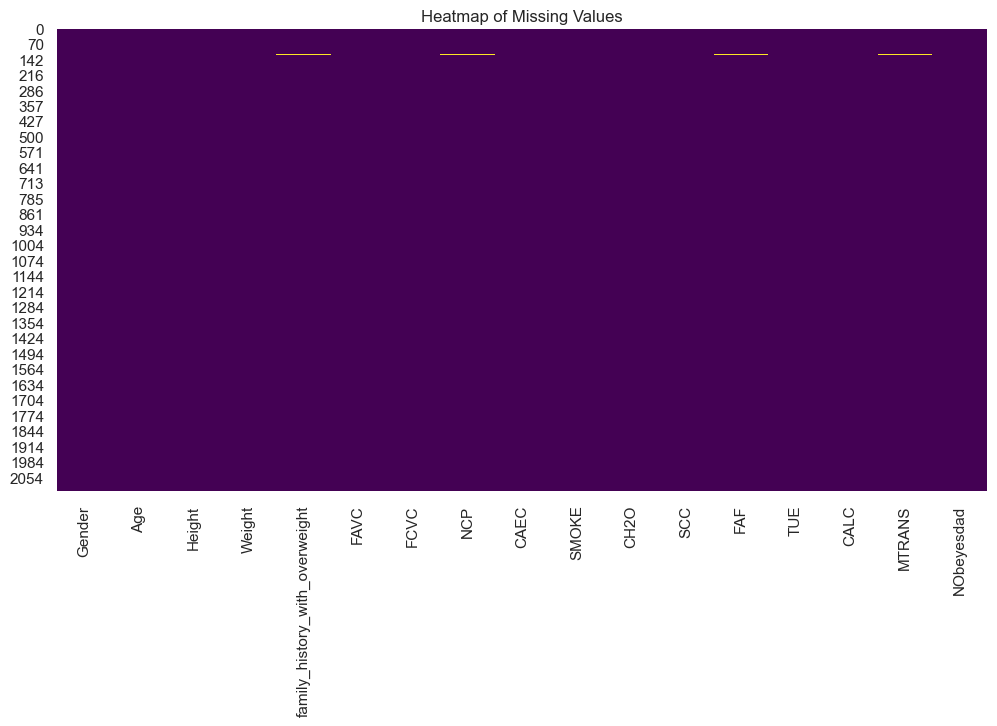

In [304]:
# Create a heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

### **Handling Missing Values**

In [305]:
# Impute missing values
df['family_history_with_overweight'].fillna(df['family_history_with_overweight'].mode()[0], inplace=True)
df['NCP'].fillna(df['NCP'].median(), inplace=True)
df['SMOKE'].fillna(df['SMOKE'].mode()[0], inplace=True)
df['FAF'].fillna(df['FAF'].median(), inplace=True)
df['MTRANS'].fillna(df['MTRANS'].mode()[0], inplace=True)
df['NObeyesdad'].fillna(df['NObeyesdad'].mode()[0], inplace=True)

In [306]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

**We can see that after median and mode imputations, there are no missing values in our dataset.**

### **Outlier Detection**

Next, let's detect outliers in the numerical columns.

**We'll use the IQR (Interquartile Range) method for this purpose.**

In [307]:
# Function to detect outliers using the IQR method
def detect_outliers(df, column):
    # Calculate the first quartile (Q1) for the given column
    Q1 = df[column].quantile(0.25)
    # Calculate the third quartile (Q3) for the given column
    Q3 = df[column].quantile(0.75)
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    # Calculate the lower bound for outliers
    lower_bound = Q1 - 1.5 * IQR
    # Calculate the upper bound for outliers
    upper_bound = Q3 + 1.5 * IQR
    # Identify outliers as data points below the lower bound or above the upper bound
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    # Return the DataFrame containing outliers
    return outliers

# List of numerical columns in the dataset to check for outliers
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Create a dictionary where the key is the column name and the value is the DataFrame of outliers
outliers_dict = {col: detect_outliers(df, col) for col in numerical_columns}

# Create a summary dictionary to count the number of outliers in each numerical column
outliers_summary = {col: len(outliers_dict[col]) for col in numerical_columns}

# Output the summary dictionary showing the count of outliers for each numerical column
outliers_summary


{'Age': 167,
 'Height': 1,
 'Weight': 2,
 'FCVC': 1,
 'NCP': 577,
 'CH2O': 1,
 'FAF': 0,
 'TUE': 0}

**The outlier detection results show the number of outliers in each numerical column:**

Age: 168 outliers

Height: 1 outlier

Weight: 2 outliers

FCVC: 1 outlier

NCP: 579 outliers

CH2O: 1 outlier

FAF: No outliers

TUE: No outliers

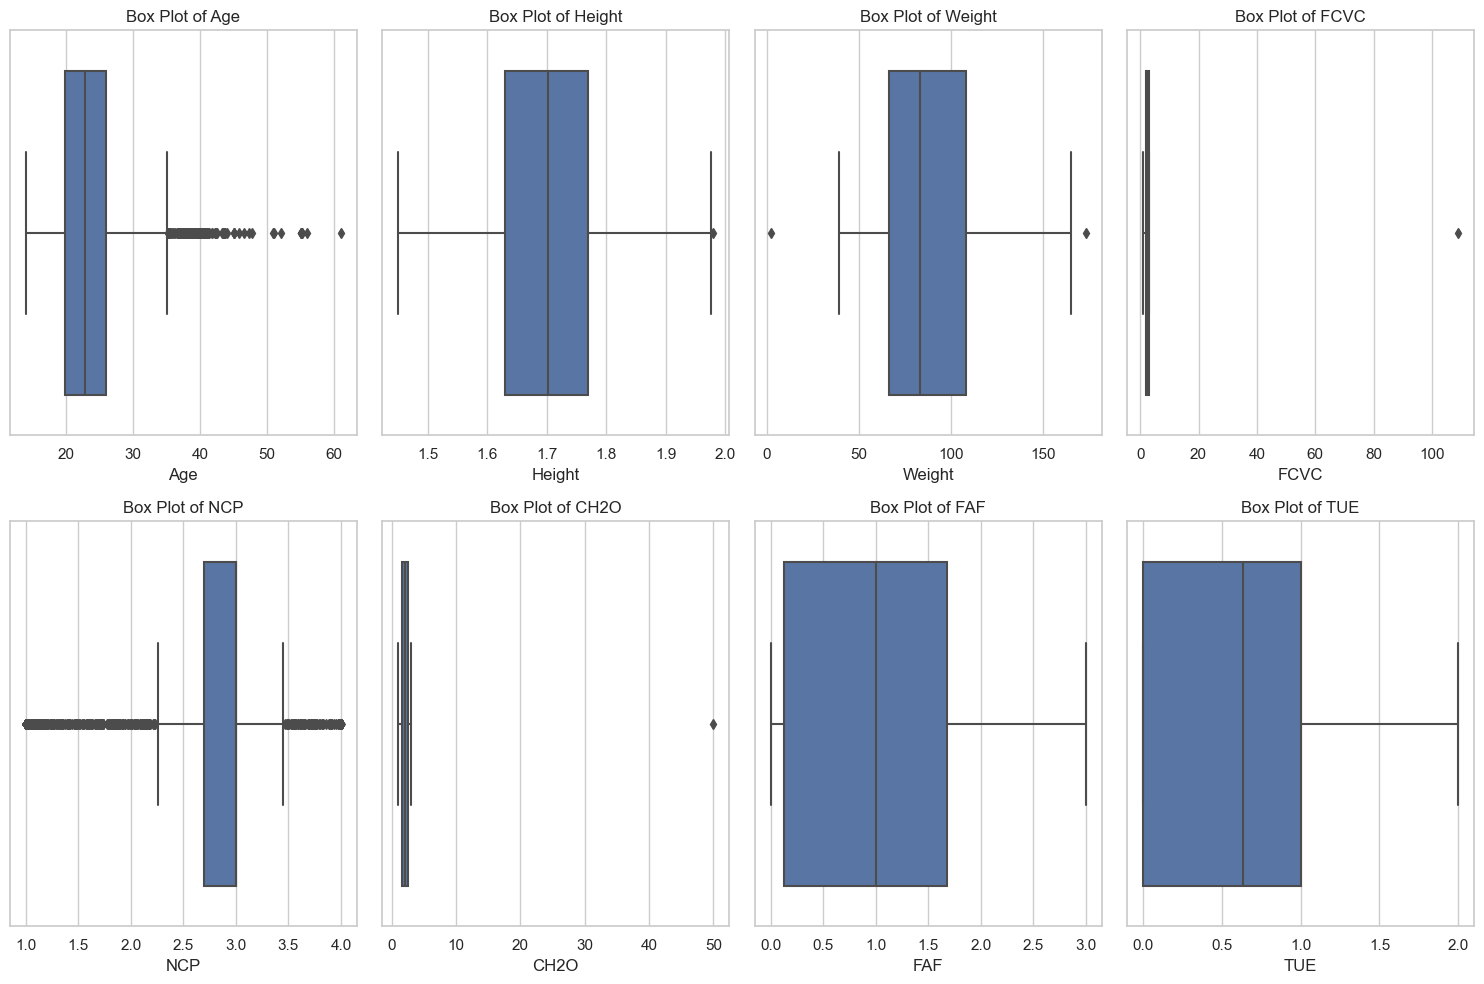

In [308]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axis objects
plt.figure(figsize=(15, 10))

# Create box plots for each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)  # Adjust the number of rows and columns
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

# Adjust layout
plt.tight_layout()
plt.show()


### **Handling Outliers**

In [309]:
# Extracting the outliers in the Age column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

outliers


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
13,Male,41.000000,1.800000,99.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,2.000000,1.00000,Frequently,Automobile,Obesity_Type_I
21,Female,52.000000,1.690000,87.000000,yes,yes,3.000000,1.000000,Sometimes,yes,2.000000,no,0.000000,0.00000,no,Automobile,Obesity_Type_I
33,Male,39.000000,1.790000,90.000000,no,no,2.000000,1.000000,Sometimes,no,2.000000,no,0.000000,0.00000,Sometimes,Public_Transportation,Overweight_Level_II
92,Male,55.000000,1.780000,84.000000,yes,no,3.000000,4.000000,Frequently,no,3.000000,yes,3.000000,0.00000,Frequently,Walking,Overweight_Level_I
104,Female,38.000000,1.560000,80.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.00000,Sometimes,Automobile,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,Male,37.765356,1.763582,117.861590,yes,yes,2.145114,2.888193,Sometimes,no,2.038128,no,0.852344,0.00000,Sometimes,Automobile,Obesity_Type_II
1775,Male,37.207082,1.762921,118.401740,yes,yes,2.136830,2.993084,Sometimes,no,1.885926,no,0.615298,0.00000,Sometimes,Automobile,Obesity_Type_II
1776,Male,38.108940,1.752863,119.201465,yes,yes,2.499388,2.989791,Sometimes,no,1.959777,no,0.608100,0.64676,Sometimes,Automobile,Obesity_Type_II
1777,Male,38.644441,1.768235,117.792268,yes,yes,2.230742,2.920373,Sometimes,no,1.831187,no,0.756277,0.00000,Sometimes,Automobile,Obesity_Type_II


***The outliers in the Age column are realistic values, i.e., they are under the age of 60, such as 45, 50, and 60.
These outliers are useful data points and do not appear to be erroneous.
Additionally, they do not significantly affect the mode or median of the data.
Therefore, we are not removing these outliers from the dataset***

In [310]:
# Extracting the outliers in the NCP column
Q1 = df['NCP'].quantile(0.25)
Q3 = df['NCP'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['NCP'] < lower_bound) | (df['NCP'] > upper_bound)]

outliers


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
4,Male,22.000000,1.780000,89.800000,no,no,2.000000,1.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
14,Male,23.000000,1.770000,60.000000,yes,yes,3.000000,1.000000,Sometimes,no,1.000000,no,1.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
16,Male,27.000000,1.930000,102.000000,yes,yes,2.000000,1.000000,Sometimes,no,1.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
17,Female,29.000000,1.530000,78.000000,no,yes,2.000000,1.000000,Sometimes,no,2.000000,no,0.000000,0.000000,no,Automobile,Obesity_Type_I
18,Female,30.000000,1.710000,82.000000,yes,yes,3.000000,4.000000,Frequently,yes,1.000000,no,0.000000,0.000000,no,Automobile,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,Male,30.642430,1.653876,102.583895,yes,yes,2.919526,2.142328,Sometimes,no,1.175714,no,0.958555,0.636289,no,Public_Transportation,Obesity_Type_II
1795,Male,20.068432,1.657132,105.580491,yes,yes,2.724121,1.437959,Sometimes,no,1.590418,no,0.029603,1.122118,no,Public_Transportation,Obesity_Type_II
1796,Male,20.914366,1.644751,101.067988,yes,yes,2.801992,1.343117,Sometimes,no,1.128942,no,0.233987,0.819980,no,Public_Transportation,Obesity_Type_II
1797,Male,25.512048,1.660761,104.321463,yes,yes,2.748971,1.213431,Sometimes,no,1.448875,no,0.128548,1.239038,no,Public_Transportation,Obesity_Type_II


* **Outliers in NCP column might represent real, significant variations in the dataset, such as instances of extreme dietary habits. Removing them could mean losing valuable information that accurately reflects the range of behaviors in the population. Besides, it is not suggested to remove such outliers in the available small sample space**

In the context of our dataset, outliers might indicate individuals with particularly high or low caloric intake, which could be important for understanding different factors contributing to obesity.

### **Data Visualisation**

### **Distribution of Numerical Columns**

In [311]:
df['Age'].describe()

count    2087.000000
mean       24.353090
std         6.368801
min        14.000000
25%        19.915937
50%        22.847618
75%        26.000000
max        61.000000
Name: Age, dtype: float64

**Univariate Analysis**

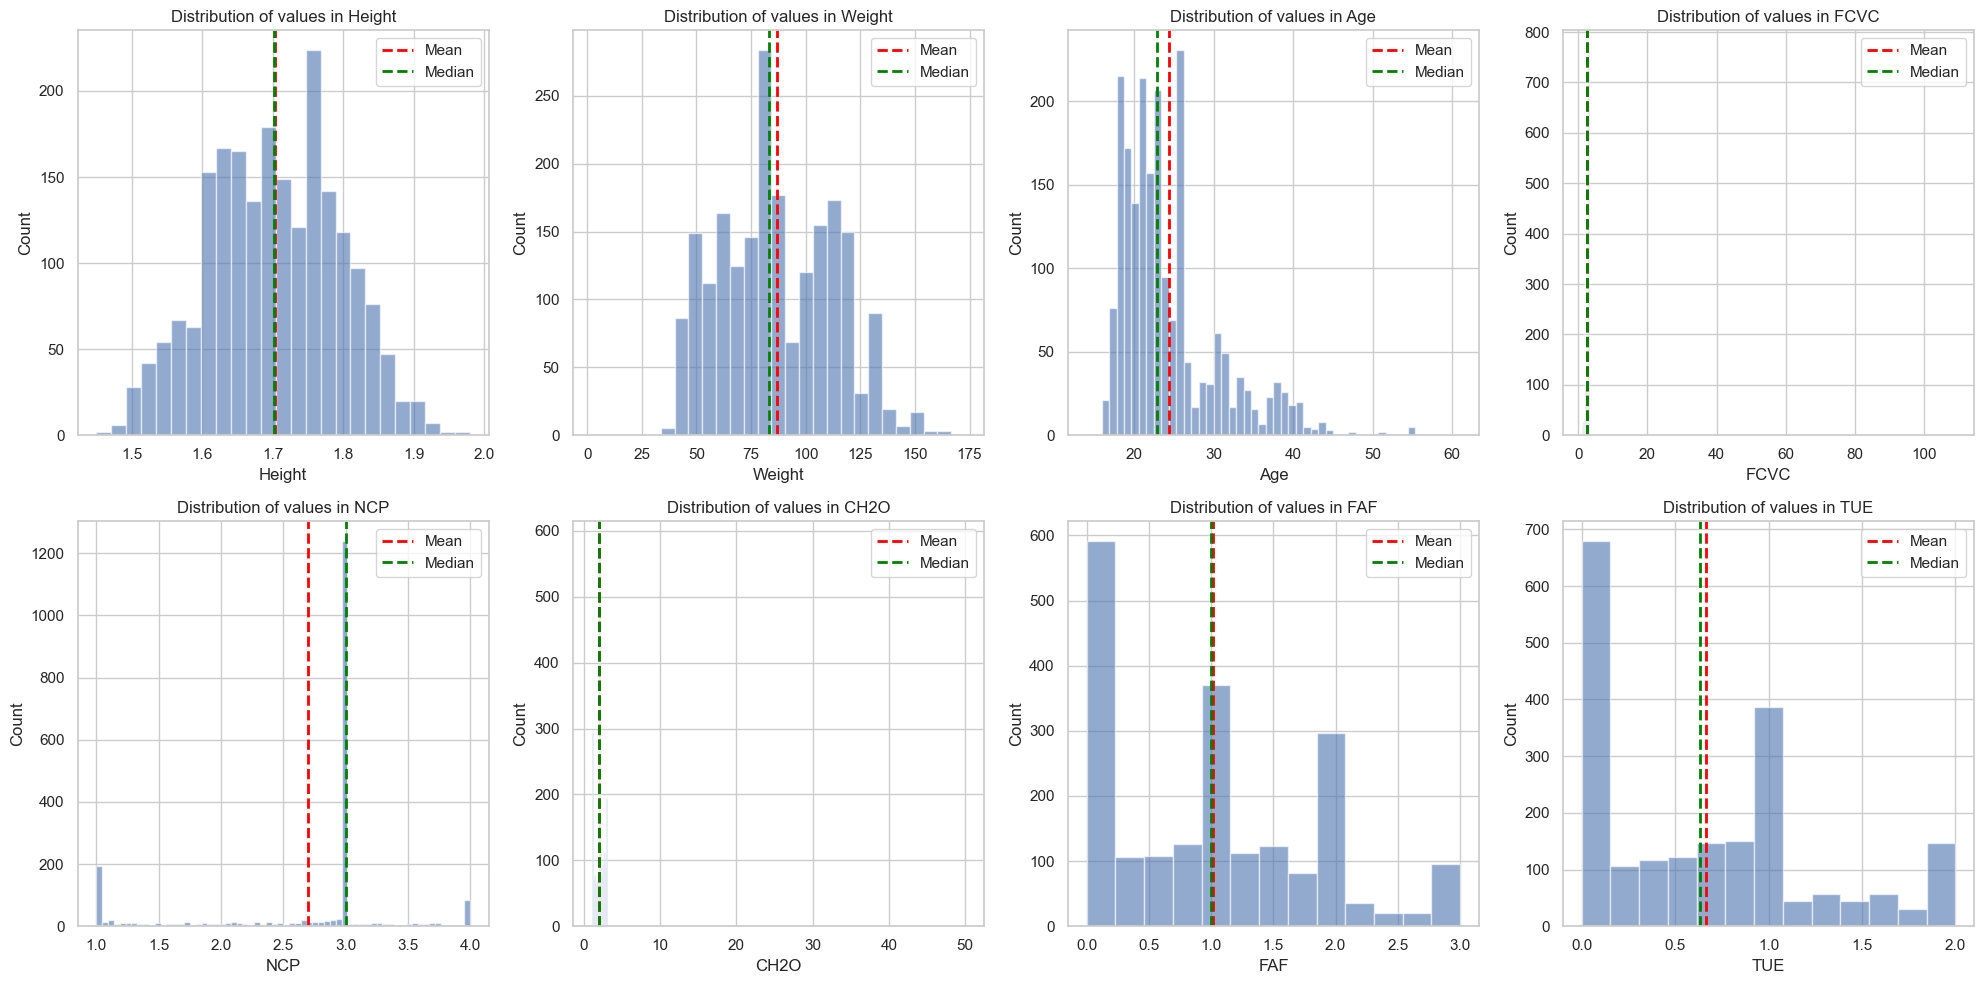

In [312]:
def plot_distribution_subplot(ax, dataset, feature):
    """
    Function: Computes and displays distribution of features with continuous values in a subplot;
    plots their mean and median.

    Parameters:
        ax: The subplot axis to plot on.
        dataset: The pandas DataFrame containing the data.
        feature: The name of the numerical column to plot.
    """
    # Plot a histogram of the specified feature from the dataset
    # using the Freedman-Diaconis rule for the number of bins
    # Set the transparency to 60% and the color to blue
    ax.hist(df[feature], bins="fd", alpha=0.6, color='b')

    # Add a vertical line at the mean of the feature's values
    # Set the line color to red, make it dashed, set linewidth to 2,
    # and add a label "Mean" for the legend
    ax.axvline(dataset[feature].mean(), color="red", linestyle='dashed', linewidth=2, label="Mean")

    # Add a vertical line at the median of the feature's values
    # Set the line color to orange, make it dashed, set linewidth to 2,
    # and add a label "Median" for the legend
    ax.axvline(dataset[feature].median(), color="green", linestyle='dashed', linewidth=2, label="Median")

    # Set the x-axis label to the name of the feature
    ax.set_xlabel(f"{feature}")

    # Set the y-axis label to "Count"
    ax.set_ylabel("Count")

    # Add a legend to the plot
    ax.legend()

    # Set the title of the plot to "Distribution of values in {feature}"
    ax.set_title(f"Distribution of values in {feature}")


# List of column names to plot
columns = ["Height", "Weight", "Age", "FCVC", "NCP", "CH2O", "FAF", "TUE"]

# Create a grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each distribution in its respective subplot
for ax, column in zip(axes, columns):
    plot_distribution_subplot(ax, df, column)

# Adjust layout
plt.tight_layout()
plt.show()

**Inferences:**

1. **Height:** Most people are 1.60 m - 1.85 m tall. Both mean and median values are around 1.70 and the feature is not normally distributed.

2. **Weight:** Since most people are weighing above 80 kg, the mean and median are skewed towards it and the distribution doesn't provide any information.

3. **Age:** This feature is not normally distributed and more positive skewed with the youngest personin the group is of 16 years old and the oldest being 61 years old as we can see from the descriptive statistics.


**Bivariate Analysis**

To visualize the data and find patterns, I created a series of plots:

1. Distribution of obesity levels
2. Age and obesity levels
3. Gender and obesity levels
4. Family history and obesity levels
5. Physical activity and obesity levels

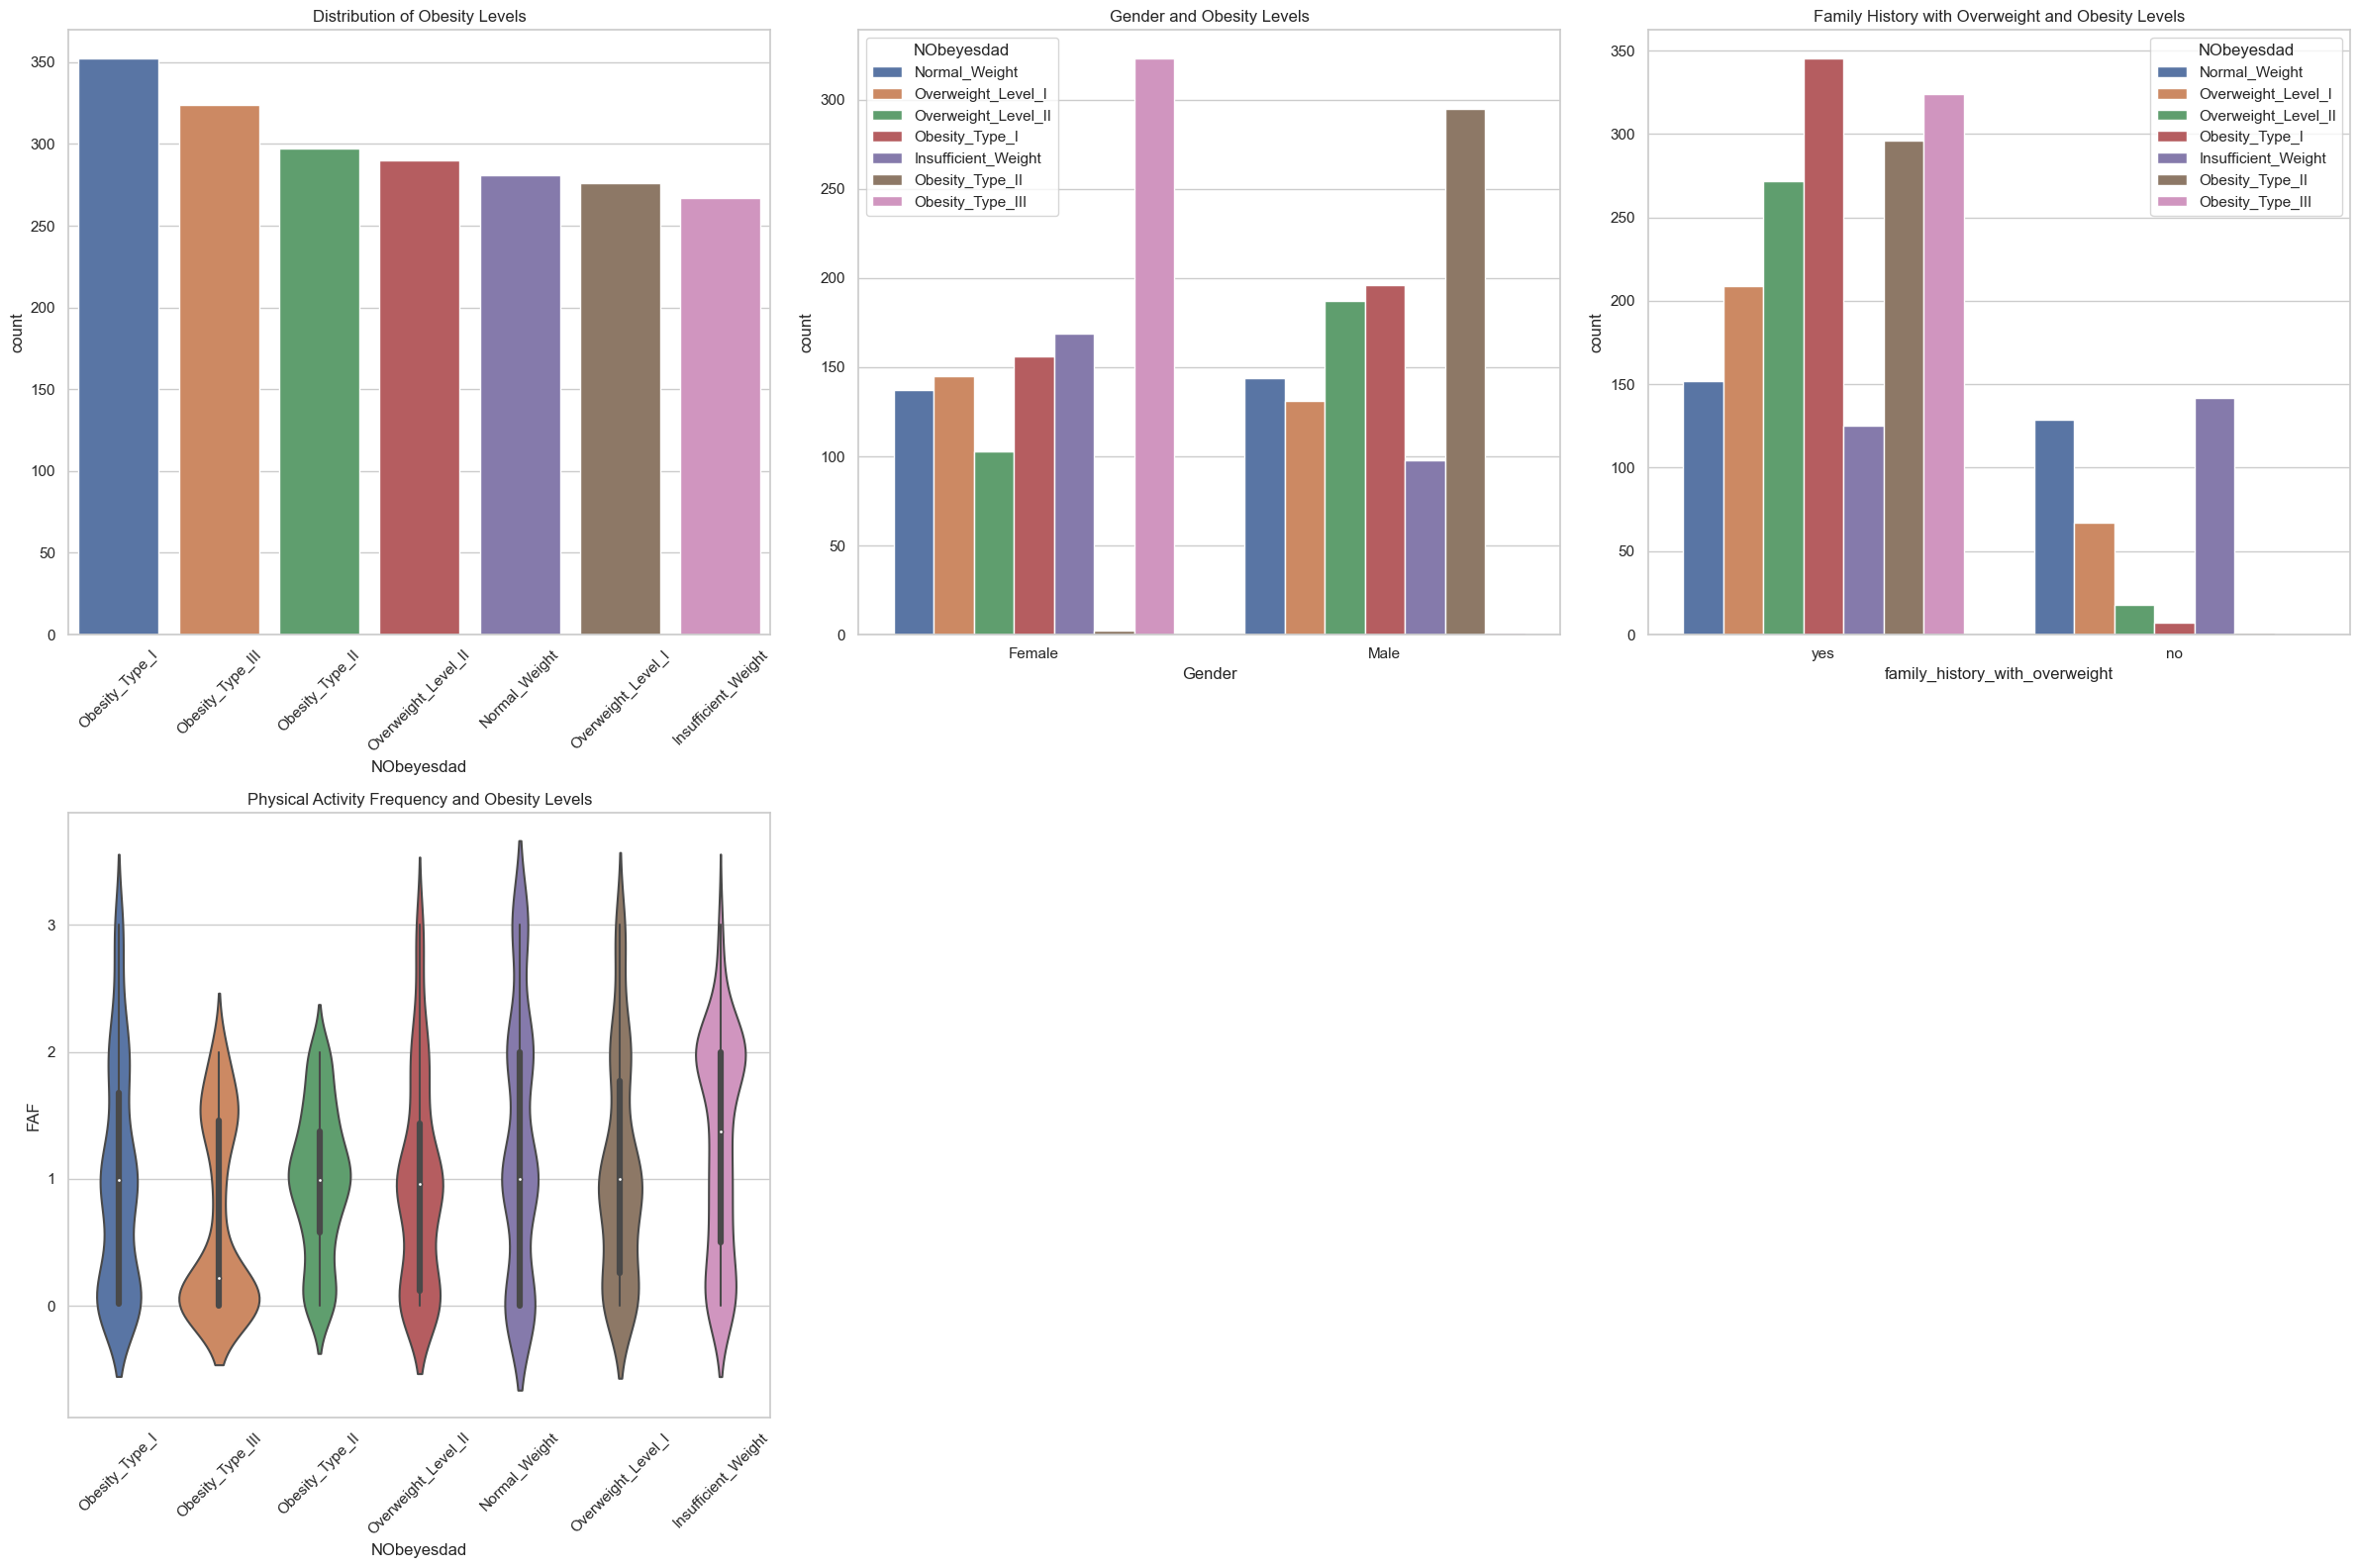

In [313]:
"""
Create a subplot in the 2x3 grid, in the 1st position
Set the figure size to (24, 16) inches
Create a count plot for the 'NObeyesdad' column with the desired feature name and order
Rotate x-axis labels by 45 degrees for better readability
Set the title of the subplot

"""
# Set up the matplotlib figure
plt.figure(figsize=(24, 16))

# Distribution of obesity levels
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Obesity Levels')

# Gender and obesity levels
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Gender', hue='NObeyesdad', order=['Female', 'Male'])
plt.title('Gender and Obesity Levels')

# Family history and obesity levels
plt.subplot(2, 3, 3)
sns.countplot(data=df, x='family_history_with_overweight', hue='NObeyesdad')
plt.title('Family History with Overweight and Obesity Levels')

# Physical activity and obesity levels
plt.subplot(2, 3, 4)
sns.violinplot(data=df, x='NObeyesdad', y='FAF', order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Physical Activity Frequency and Obesity Levels')

plt.tight_layout()
plt.show()


**Findings from Exploratory Data Analysis**

**Distribution of Obesity Levels:**

1. The dataset shows various categories of obesity levels, including
"Normal_Weight," "Overweight_Level_I," "Overweight_Level_II," and multiple levels of obesity.
"Normal_Weight" and "Overweight_Level_I" are the most common categories.

**Gender and Obesity Levels:**

1. Both males and females are represented across all obesity levels.
There isn't a significant gender disparity in any particular obesity category, indicating that obesity affects both genders similarly in this dataset.

**Family History and Obesity Levels:**

1. Individuals with a family history of overweight are more likely to fall into higher obesity categories.
2. This suggests a possible genetic or environmental influence on obesity.

**Physical Activity Frequency and Obesity Levels:**

1. There is an inverse relationship between physical activity frequency (FAF) and obesity levels. Individuals with higher obesity levels tend to engage in less physical activity.


2. The distributions for **Obesity Type I, II, and III** are generally wider at lower FAF values, indicating that individuals with higher obesity levels tend to have lower frequencies of physical activity.



3. **Overweight Levels I and II** categories have slightly higher median FAF values compared to the obesity categories.
The distribution shows a mix of low and moderate physical activity frequencies.



4. The median FAF value for **normal weight individuals** is higher than that for overweight and obese individuals.The distribution is more balanced, with a concentration around higher physical activity frequencies.

5. **Insufficient Weight** category has a relatively high median FAF value, similar to or higher than the normal weight category.
The distribution indicates higher physical activity frequencies among individuals with insufficient weight.

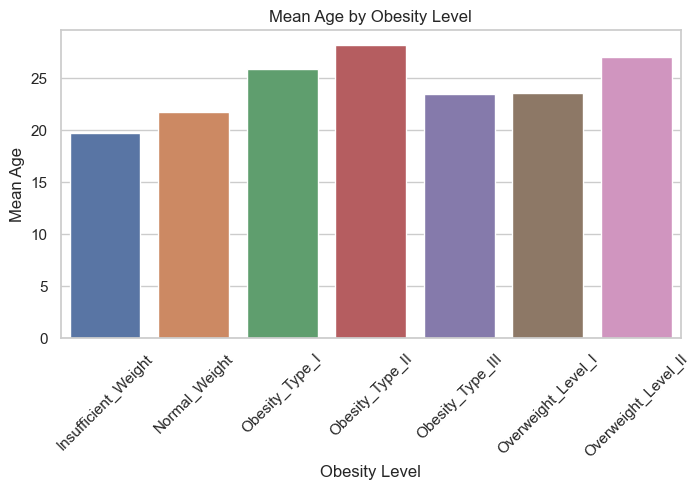

In [314]:
#Age and Obesity Levels

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean age for each obesity level
mean_ages = df.groupby('NObeyesdad')['Age'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8,4))
sns.barplot(data=mean_ages, x='NObeyesdad', y='Age', order=mean_ages['NObeyesdad'])
plt.xticks(rotation=45)
plt.title('Mean Age by Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Mean Age')
plt.show()


**Observations:**

**Insufficient Weight:** This category has the lowest mean age, which is negative in the standardized age scale used in the plot.

**Normal Weight:** The mean age is slightly above 20, indicating younger individuals ahve normal weight on average compared to those in the obesity categories.

**Obesity Types I, II, and III:** These categories have progressively higher mean ages, with Obesity Type II showing the highest mean age. This indicates that individuals in these categories tend to be older on average.

The bar plot clearly shows that individuals with higher obesity levels tend to have higher mean ages compared to those with normal or insufficient weight.

**This means that individuals with higher obesity levels tend to be slightly older on average**

**Relation between height and weight**

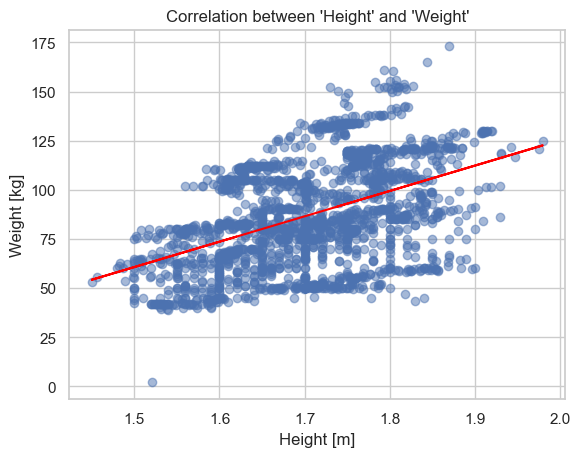

In [315]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df is a DataFrame with columns 'Height' and 'Weight'

# Scatter plot
plt.scatter(df["Height"], df["Weight"], alpha=0.5)
# alpha controls the transparency of the points - sets the transparency of the points to 50%, making overlapping points easier to see.

# Linear regression line
m, b = np.polyfit(df["Height"], df["Weight"], 1)   # computes the slope m and intercept b of the best-fit line (linear regression) for the data.
plt.plot(df["Height"], m * df["Height"] + b, color="red")

# Labels and title
plt.xlabel("Height [m]")
plt.ylabel("Weight [kg]")
plt.title("Correlation between 'Height' and 'Weight'")

# Show plot
plt.show()


**The red line shows that there is a positive correlation between them, which means an increase in one variable leads to an increase in the other. Which means taller people are more likely to weight more.**

## **Categorical Analysis**

## **Count Plots**

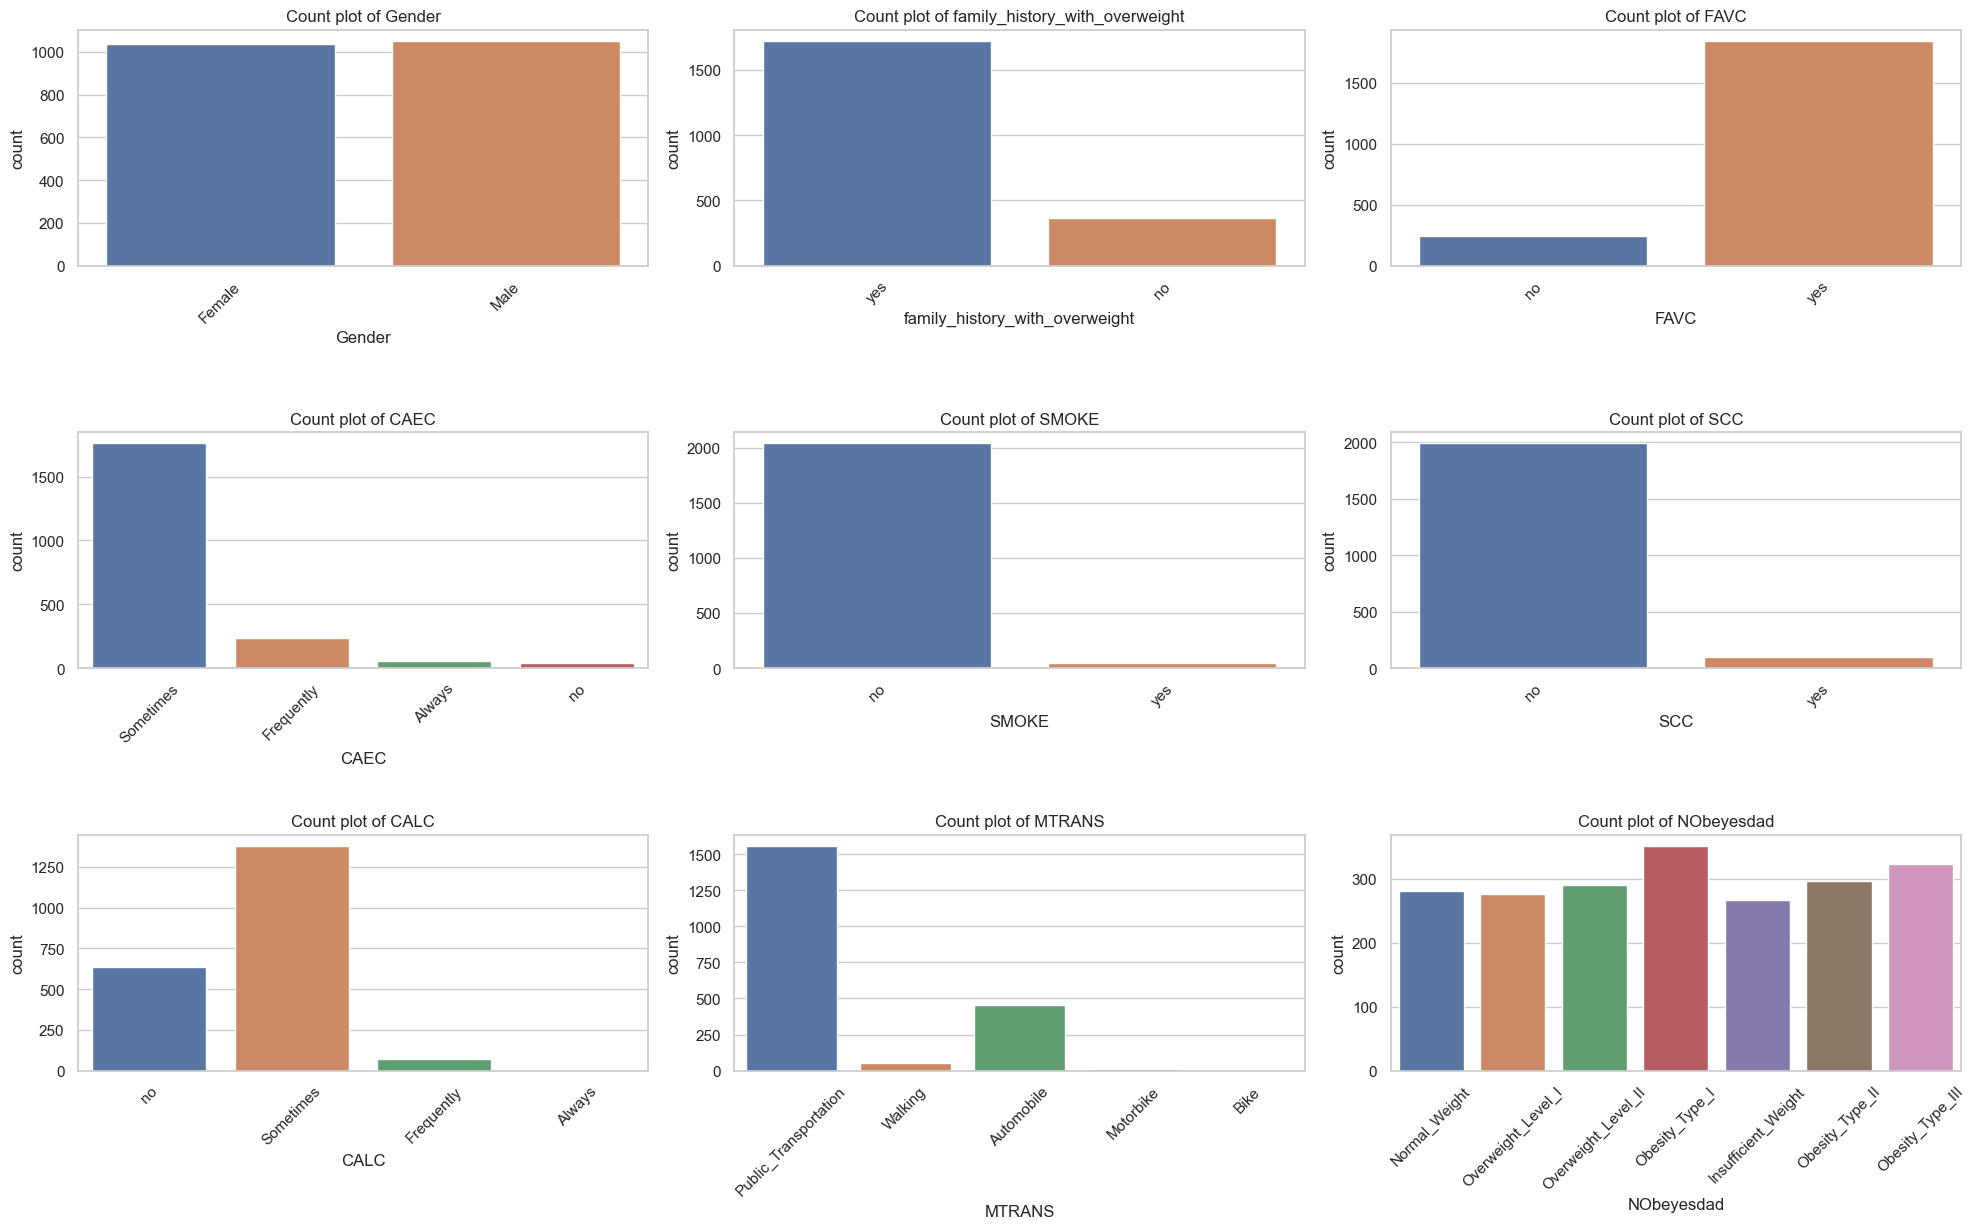

In [316]:
# List of categorical columns to plot
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

# Create a new figure with specified size
plt.figure(figsize=(20, 15))

# Loop through each categorical column to create a subplot
for i, col in enumerate(categorical_columns, 1):  # '1' ensures enumeration starts from 1
    plt.subplot(4, 3, i)  # Create a subplot in a 4x3 grid
    sns.countplot(x=df[col])  # Create a count plot for the current categorical column
    plt.title(f'Count plot of {col}')  # Set the title for the subplot
    plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for better readability

# Adjust subplots to fit into the figure area neatly
plt.tight_layout()

# Display the figure with all subplots
plt.show()



## **Cross Plots**

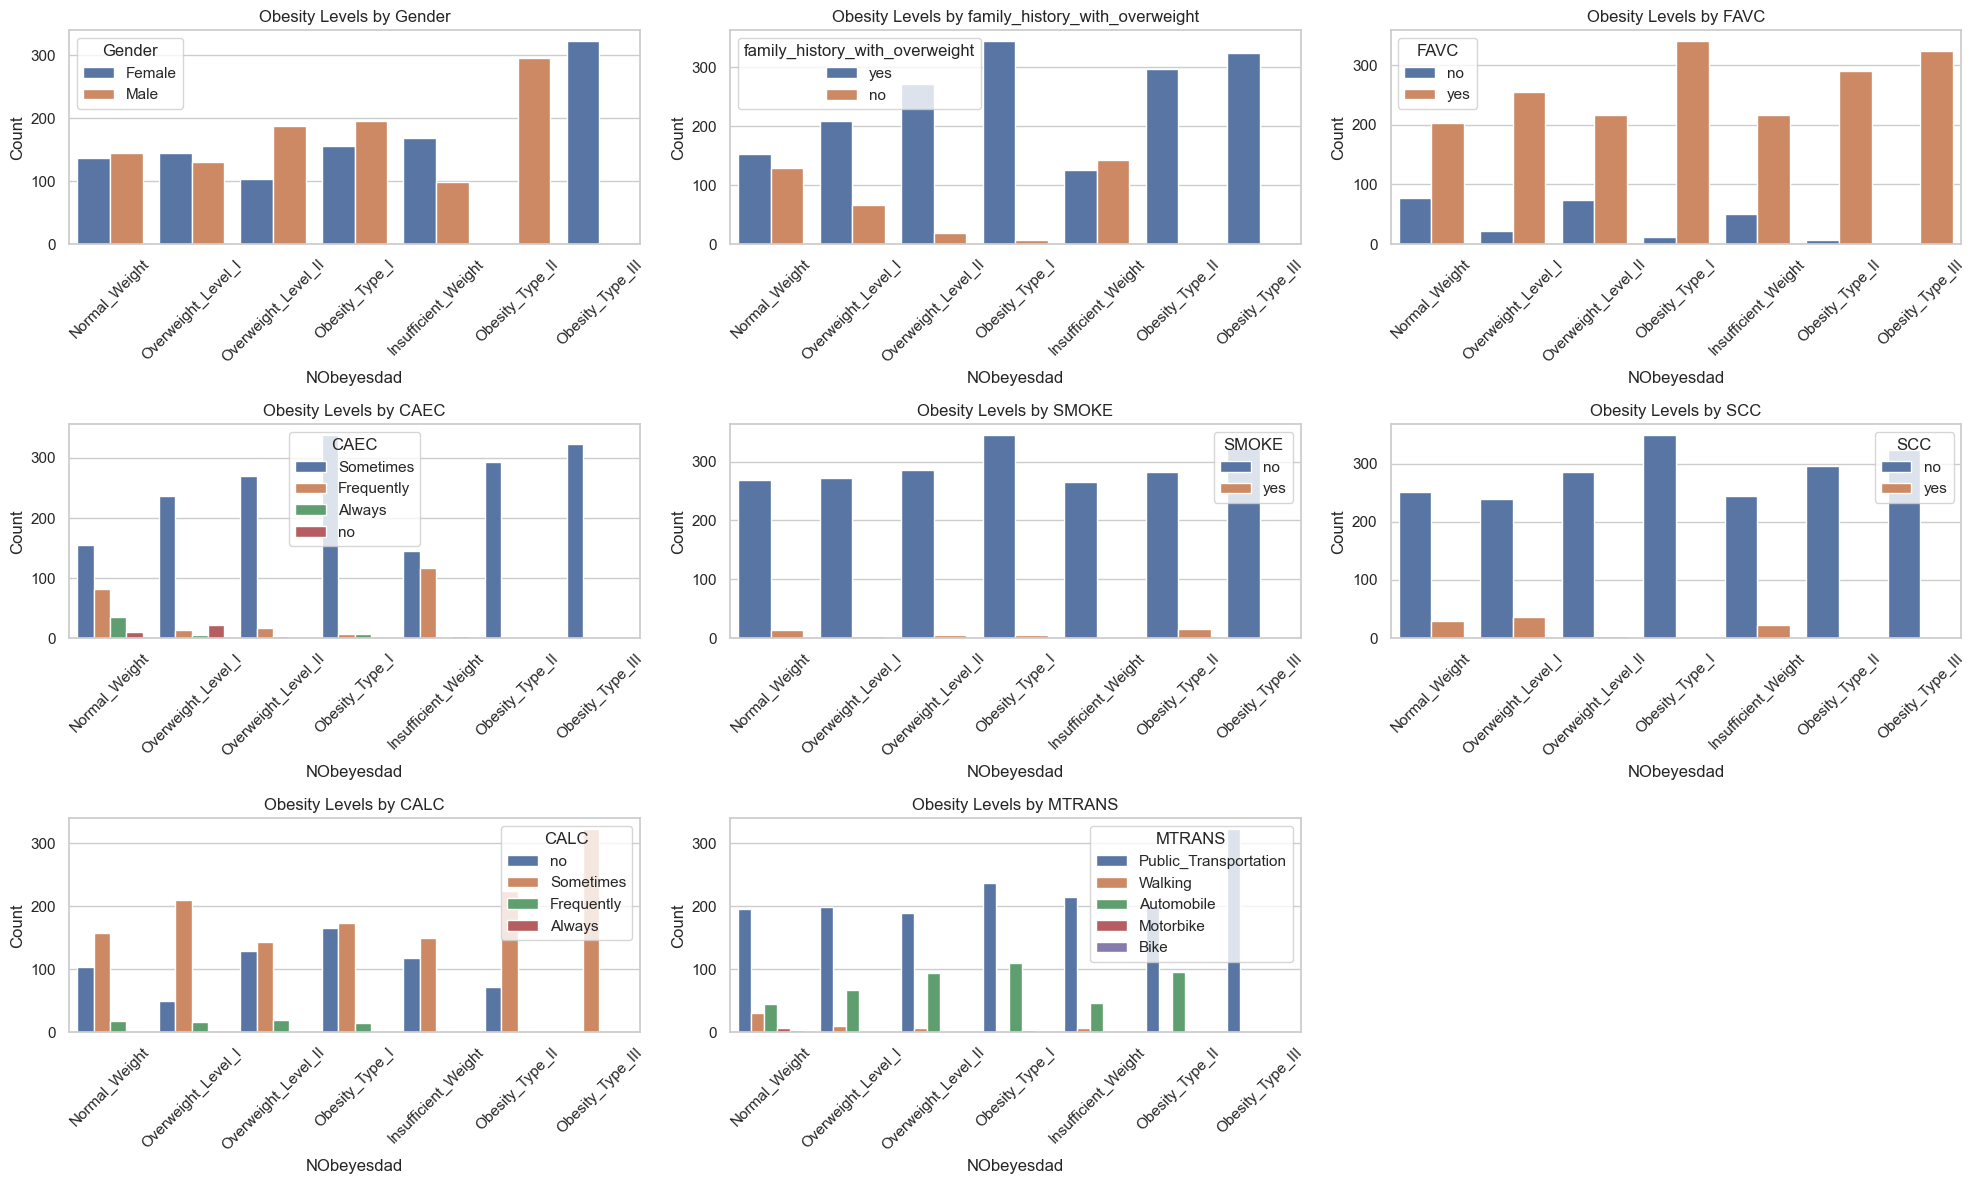

In [317]:
# List of categorical variables to compare with the target label 'NObeyesdad'
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Set up the matplotlib figure with a size large enough to contain all subplots
plt.figure(figsize=(20, 12))

# Iterate through the categorical variables and create subplots
for i, column in enumerate(categorical_columns):
    plt.subplot(3, 3, i+1)  # Create a subplot in a 2x3 grid
    sns.countplot(data=df, x='NObeyesdad', hue=column)
    plt.title(f'Obesity Levels by {column}')
    plt.xticks(rotation=45)
    plt.xlabel('NObeyesdad')
    plt.ylabel('Count')

# Adjust the layout to prevent overlap and ensure everything fits within the figure area
plt.tight_layout()

# Display the plot
plt.show()



**Inferences:**

1. Female are more likely are underweight as compared to men and men are obese than women.
2. All those categorised as overweight or obese had family members suffering from weight problems. Inheritance  of obesity from family members is observed.
3. The consumption of high-calorie foods is common among both normal-weight and overweight/obese individuals. It seems that the amount of food eaten plays a crucial role in affecting body fat levels.
4. Smoking doesn't influence he body weight of the person.
5. People who tend to monitor their calories intake are less likely to get excess weight.
6. There is no significant impact of consuming alcohol on obesity.
7. People who doesn't walk much are likely to get obese.

## **Correlation Analysis**

In [318]:
df[numerical_columns].corr()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.031748,0.198370,0.021924,-0.055823,-0.029079,-0.148900,-0.302927
Height,-0.031748,1.000000,0.458067,-0.030121,0.227806,0.099764,0.293969,0.041808
Weight,0.198370,0.458067,1.000000,0.017654,0.093609,0.097097,-0.056178,-0.079306
FCVC,0.021924,-0.030121,0.017654,1.000000,0.041513,0.005277,0.000250,-0.046616
NCP,-0.055823,0.227806,0.093609,0.041513,1.000000,0.045155,0.128079,0.015693
CH2O,-0.029079,0.099764,0.097097,0.005277,0.045155,1.000000,0.126993,0.052044
FAF,-0.148900,0.293969,-0.056178,0.000250,0.128079,0.126993,1.000000,0.059047
TUE,-0.302927,0.041808,-0.079306,-0.046616,0.015693,0.052044,0.059047,1.000000


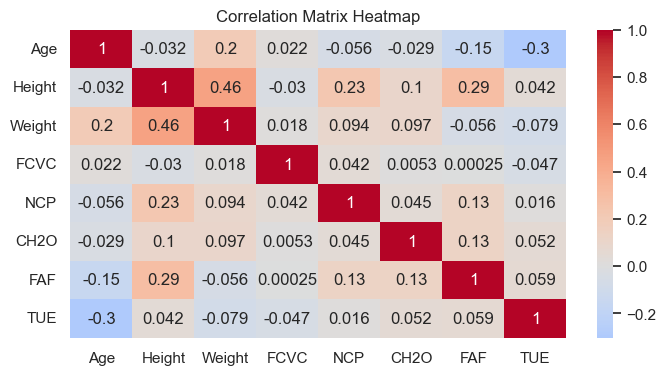

In [319]:
# Plot the correlation matrix and heatmap
corr_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Inferences:**

The correlation heatmap shows the relationships between the numerical variables. Here are some notable correlations:


Age and FAF: Slight negative correlation.(Physical Activity Frequency)

Age and TUE : Slight negative correlation. (Time using technology)

Height and Weight: Moderate positive correlation.

Height and FAF : Moderate positive correlation

**Since none of the features are highly correlated, there is no need to drop any of the features from our dataset.**



## Encoding

We are doing a total of 3 different types of encodings here:
1. Ordinal encoding for ordinal columns which have inherent order.
2. One hot Encoding for Nominal columns.
3. Label Encoding for Target feature.


In [320]:
#list out the nominal, ordinal and target vaiables
nominal_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
ordinal_features = ['FAF', 'TUE', 'NCP', 'CH2O', 'FCVC']
target = 'NObeyesdad'

### One hot Encoding

In [321]:
# One-Hot Encoding for nominal features
data_encoded = pd.get_dummies(df, columns=nominal_features, drop_first=True)

### Ordinal Encoding

In [322]:
#Ordinal Encoding for Ordinal Columns
ordinal_encoder = OrdinalEncoder()
data_encoded[ordinal_features] = ordinal_encoder.fit_transform(data_encoded[ordinal_features])

In [323]:
#Displaying the columns of the encoded dataframe
data_encoded.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'NObeyesdad', 'Gender_Male', 'family_history_with_overweight_yes',
       'FAVC_yes', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes',
       'SCC_yes', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'],
      dtype='object')

In [324]:
data_encoded.shape

(2087, 24)

### Label Encoding

In [325]:
#Encode the target variable using label encoding
label_encoder = LabelEncoder()
data_encoded[target] = label_encoder.fit_transform(data_encoded[target])

In [326]:
#Seperate the features into X and Y
X = data_encoded.drop(columns=[target])
y = data_encoded[target]

### Splitting the data into train and test sets

In [327]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Min Max Scaler**

In [328]:
#Applying MinMax Scaler to standardise our dataset
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify the encoded and scaled data types
print(type(X_train_scaled))
print(type(X_test_scaled))

# Display the shape of the datasets to verify the preprocessing steps
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X_train shape: (1669, 23)
X_test shape: (418, 23)
y_train shape: (1669,)
y_test shape: (418,)


## **Model Building**

We will perform the model development part in two ways, one is without tuning and the other is without hyperparameter tuning and then compare the accuracies

In [329]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

### Logistic Regression and Decision Tree Classifier without tuning

Logistic Regression Default Accuracy: 0.7105263157894737
Logistic Regression Default F1 Score: 0.7013606253532322
Logistic Regression Default Precision: 0.698771742856026
Logistic Regression Default Recall: 0.7105263157894737
Logistic Regression Default Confusion Matrix:
 [[48  8  0  0  1  2  0]
 [12 24  4  0  0 15  5]
 [ 0  2 47  9  2  4  7]
 [ 0  0  0 63  0  0  1]
 [ 0  0  0  0 60  0  0]
 [ 1  5  7  0  0 32 10]
 [ 0  3 16  3  0  4 23]]
Decision Tree Default Accuracy: 0.9234449760765551
Decision Tree Default F1 Score: 0.9224444786285334
Decision Tree Default Precision: 0.9237768382119497
Decision Tree Default Recall: 0.9234449760765551
Decision Tree Default Confusion Matrix:
 [[57  2  0  0  0  0  0]
 [ 6 44  0  0  0 10  0]
 [ 0  0 67  0  1  1  2]
 [ 0  0  2 62  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  5  0  0  0 49  1]
 [ 0  0  2  0  0  0 47]]
Decision Tree Feature Importances (Default): [0.02818035 0.26840201 0.46936904 0.01410218 0.0093163  0.00249805
 0.00254752 0.00637059 0.15917054

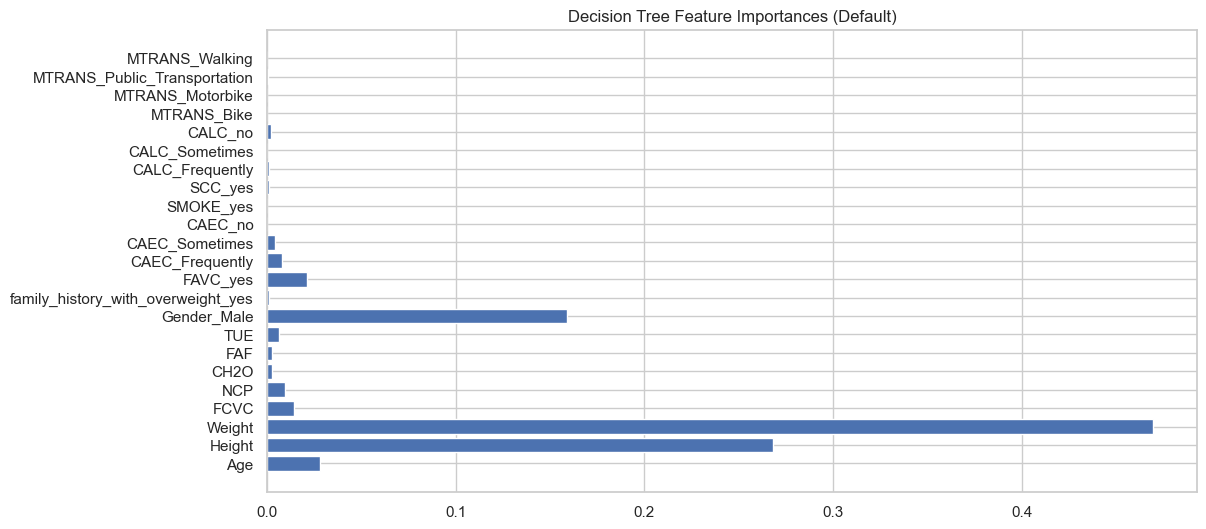

In [342]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score

# Logistic Regression without tuning
log_reg_default = LogisticRegression(max_iter=1000)
log_reg_default.fit(X_train_scaled, y_train)
y_pred_log_reg_default = log_reg_default.predict(X_test_scaled)

#Metrics
accuracy_log_reg_default = accuracy_score(y_test, y_pred_log_reg_default)
f1_log_reg_default = f1_score(y_test, y_pred_log_reg_default, average='weighted')
precision_log_reg_default = precision_score(y_test, y_pred_log_reg_default, average='weighted')
recall_log_reg_default = recall_score(y_test, y_pred_log_reg_default, average='weighted')

#Confusion Matrix
conf_matrix_log_reg_default = confusion_matrix(y_test, y_pred_log_reg_default)

#======================================================================================================#

# Decision Tree without tuning
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)
y_pred_dt_default = dt_default.predict(X_test)

#Metrics
accuracy_dt_default = accuracy_score(y_test, y_pred_dt_default)
f1_dt_default = f1_score(y_test, y_pred_dt_default, average='weighted')
precision_dt_default = precision_score(y_test, y_pred_dt_default, average='weighted')
recall_dt_default = recall_score(y_test, y_pred_dt_default, average='weighted')
conf_matrix_dt_default = confusion_matrix(y_test, y_pred_dt_default)

#Confusion Matrix
conf_matrix_dt_default = confusion_matrix(y_test, y_pred_dt_default)

#Feature Importances
feature_importances_dt_default = dt_default.feature_importances_


# Print metrics for Logistic Regression
print("Logistic Regression Default Accuracy:", accuracy_log_reg_default)
print("Logistic Regression Default F1 Score:", f1_log_reg_default)
print("Logistic Regression Default Precision:", precision_log_reg_default)
print("Logistic Regression Default Recall:", recall_log_reg_default)
print("Logistic Regression Default Confusion Matrix:\n", conf_matrix_log_reg_default)

print("===============================================================================================")

# Print metrics for Decision Tree
print("Decision Tree Default Accuracy:", accuracy_dt_default)
print("Decision Tree Default F1 Score:", f1_dt_default)
print("Decision Tree Default Precision:", precision_dt_default)
print("Decision Tree Default Recall:", recall_dt_default)
print("Decision Tree Default Confusion Matrix:\n", conf_matrix_dt_default)

print("===============================================================================================")

# Plot feature importances for Decision Tree
print("Decision Tree Feature Importances (Default):", feature_importances_dt_default)

print("===============================================================================================")

plt.figure(figsize=(12, 6))
plt.barh(X_train.columns, feature_importances_dt_default)
plt.title("Decision Tree Feature Importances (Default)")
plt.show()


### **Analysis and Interpretation**

**Accuracy:**

The decision tree model significantly outperforms the logistic regression model with an accuracy of 92.34% compared to 71.05%. This indicates that the decision tree is better suited for this particular classification problem, likely due to its ability to handle non-linear relationships and interactions between features.

**Confusion Matrix:**

For the logistic regression model, there are more misclassifications compared to the decision tree model. This can be seen by the higher number of off-diagonal elements in the logistic regression confusion matrix.
The decision tree confusion matrix shows fewer misclassifications, indicating better performance in predicting the correct classes.

**Feature Importances:**
We can see from the plot that **Weight, Height, Gender** are the more significant features as compared to others and can be considered as the main reasons for obesity.

**Now let's try hyperparameter tuning to see if there's any increase in the accuracy.**

### Hyperparameter Tuning with Grid Search Cross Validation

Logistic Regression Tuned Accuracy: 0.9425837320574163
Logistic Regression Tuned F1 Score: 0.9427000652208432
Logistic Regression Tuned Precision: 0.9450966030856055
Logistic Regression Tuned Recall: 0.9425837320574163
Logistic Regression Tuned Confusion Matrix:
 [[53  5  0  0  1  0  0]
 [ 1 58  0  0  0  1  0]
 [ 0  1 66  2  2  0  0]
 [ 0  0  0 61  3  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  1  0  0  0 50  4]
 [ 0  0  1  0  1  1 46]]
Decision Tree Tuned Accuracy: 0.9569377990430622
Decision Tree Tuned F1 Score: 0.9570242357323696
Decision Tree Tuned Precision: 0.9573002206610955
Decision Tree Tuned Recall: 0.9569377990430622
Decision Tree Tuned Confusion Matrix:
 [[55  4  0  0  0  0  0]
 [ 3 54  0  0  0  3  0]
 [ 0  1 70  0  0  0  0]
 [ 0  0  2 62  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  1  0  0  0 52  2]
 [ 0  0  0  0  0  2 47]]
Decision Tree Feature Importances (Tuned): [0.01882698 0.227979   0.58909991 0.00132281 0.00843109 0.01102501
 0.00498039 0.         0.12290172 0.         0.0105633

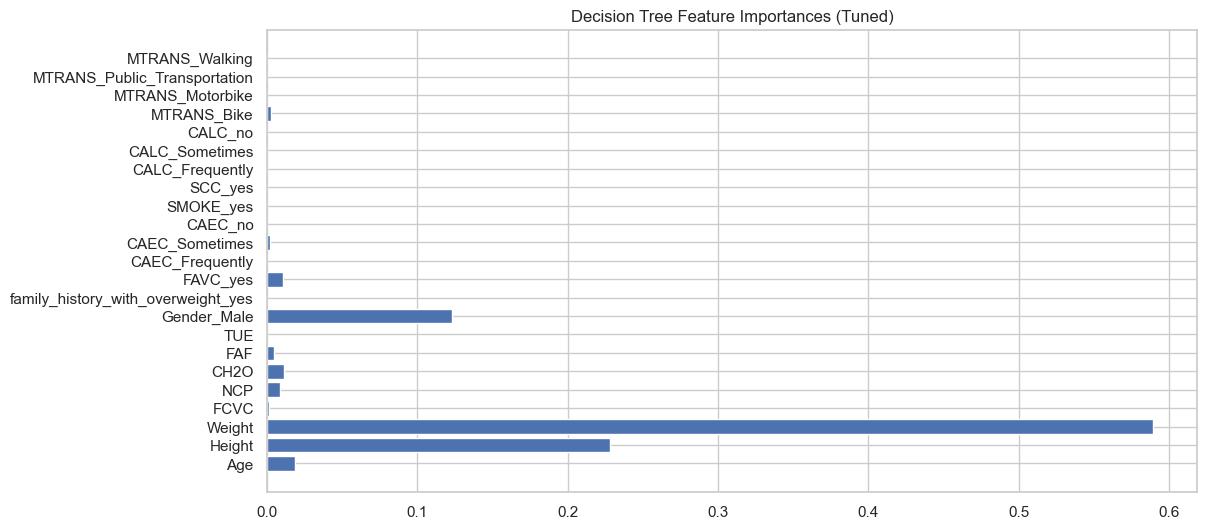

Best hyperparameters for Logistic Regression:
{'C': 0.01, 'penalty': 'none', 'solver': 'newton-cg'}

Best hyperparameters for Decision Tree:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [341]:
# Logistic Regression with tuning
param_grid_log_reg = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Different penalty types for regularization
    'C': [0.01, 0.1, 1, 10, 100],                  # Inverse of regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Algorithms to use for optimization
}

# Grid search to find the best hyperparameters for Logistic Regression
grid_log_reg = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_log_reg, cv=5, n_jobs=-1)
grid_log_reg.fit(X_train_scaled, y_train)
best_log_reg = grid_log_reg.best_estimator_  # Best Logistic Regression model
y_pred_log_reg = best_log_reg.predict(X_test_scaled)

# Metrics for Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted')
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted')
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Decision Tree with tuning
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Functions to measure the quality of a split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

# Grid search to find the best hyperparameters for Decision Tree
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, n_jobs=-1)
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_  # Best Decision Tree model
y_pred_dt = best_dt.predict(X_test)

# Metrics for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
feature_importances_dt = best_dt.feature_importances_  # Importance of each feature

# Print metrics for Logistic Regression
print("Logistic Regression Tuned Accuracy:", accuracy_log_reg)
print("Logistic Regression Tuned F1 Score:", f1_log_reg)
print("Logistic Regression Tuned Precision:", precision_log_reg)
print("Logistic Regression Tuned Recall:", recall_log_reg)
print("Logistic Regression Tuned Confusion Matrix:\n", conf_matrix_log_reg)

print("===============================================================================================")

# Print metrics for Decision Tree
print("Decision Tree Tuned Accuracy:", accuracy_dt)
print("Decision Tree Tuned F1 Score:", f1_dt)
print("Decision Tree Tuned Precision:", precision_dt)
print("Decision Tree Tuned Recall:", recall_dt)
print("Decision Tree Tuned Confusion Matrix:\n", conf_matrix_dt)

print("===============================================================================================")

# Plot feature importances for Decision Tree after tuning
print("Decision Tree Feature Importances (Tuned):", feature_importances_dt)
plt.figure(figsize=(12, 6))
plt.barh(X_train.columns, feature_importances_dt)  # Horizontal bar chart for feature importances
plt.title("Decision Tree Feature Importances (Tuned)")
plt.show()

print("===============================================================================================")

# Print the best hyperparameters
print("Best hyperparameters for Logistic Regression:")
print(grid_log_reg.best_params_)
print("\nBest hyperparameters for Decision Tree:")
print(grid_dt.best_params_)


## **Interpretation:**

The feature importance plot from the Decision Tree model reveals the relative significance of each feature in predicting the target variable. Here's an interpretation of the plot:

1. The most important predictors are **Height and Weight**

2. Moderately important feature is **Gender and Age**

3. Least Important Features are FCVC (Frequency of Consumption of Vegetables), NCP (Number of main meals), CH2O (Consumption of water), FAF (Physical activity frequency), and TUE (Time using technology). These features have minimal importance but still contribute to the model.

4. Other features (e.g., CAEC, SMOKE, SCC, CALC, MTRANS) like these have very low importance, indicating that they do not significantly influence the model's predictions.

## Comparing the accuracies and confusion matrices

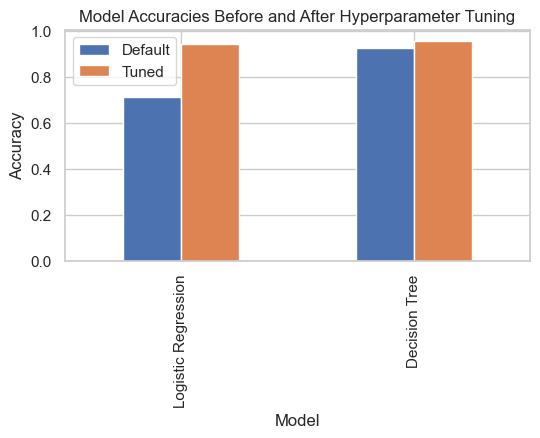

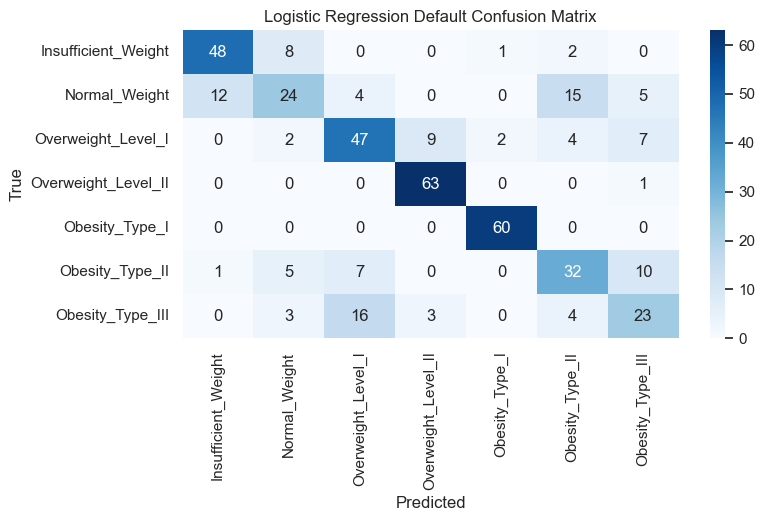

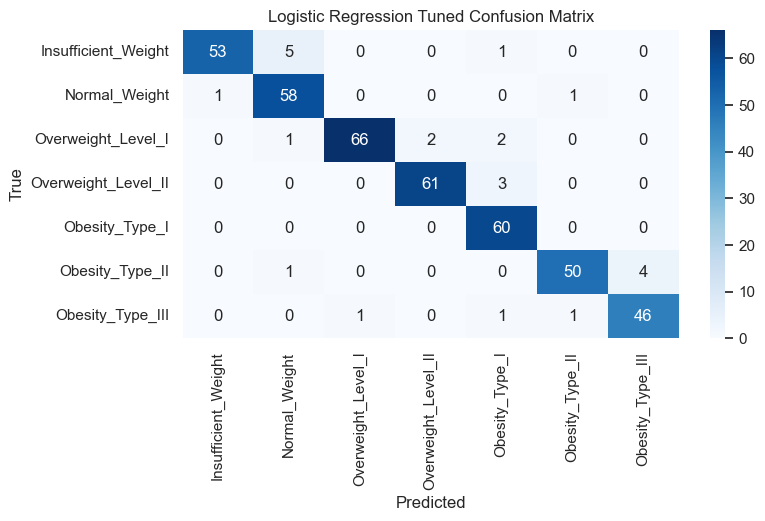

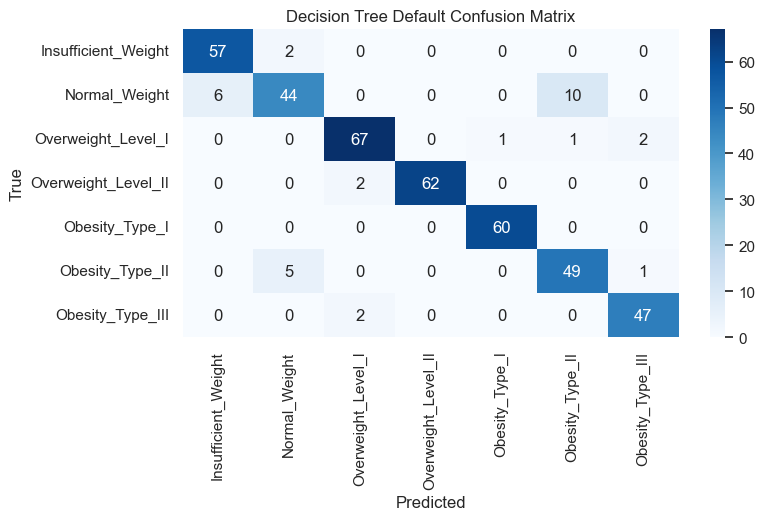

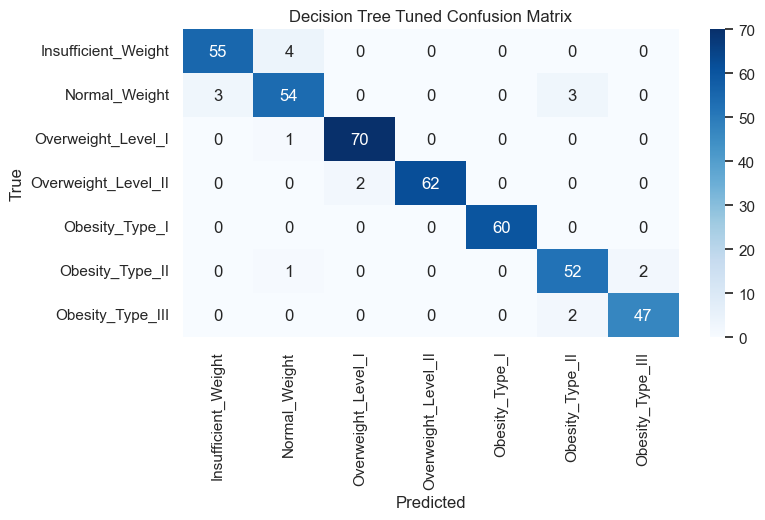

In [332]:
# Store accuracies in a dictionary
accuracies = {
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Default': [accuracy_log_reg_default, accuracy_dt_default],
    'Tuned': [accuracy_log_reg, accuracy_dt]
}

# Convert to DataFrame for easy plotting
accuracies_df = pd.DataFrame(accuracies)

# Plot the comparison
accuracies_df.plot(x='Model', y=['Default', 'Tuned'], kind='bar', figsize=(6,3))
plt.title('Model Accuracies Before and After Hyperparameter Tuning')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

class_labels = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II",
                "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]

# Function to plot confusion matrix using Seaborn
def plot_confusion_matrix(conf_matrix, class_labels, title):
    plt.figure(figsize=(8,4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Plotting confusion matrices
plot_confusion_matrix(conf_matrix_log_reg_default, class_labels, "Logistic Regression Default Confusion Matrix")  
plot_confusion_matrix(conf_matrix_log_reg, class_labels, "Logistic Regression Tuned Confusion Matrix")   
plot_confusion_matrix(conf_matrix_dt_default, class_labels, "Decision Tree Default Confusion Matrix")
plot_confusion_matrix(conf_matrix_dt, class_labels, "Decision Tree Tuned Confusion Matrix")

## **Summary:**

### **Logistic Regression:**

**Accuracy Improvement:** The tuned logistic regression model shows a significant improvement in accuracy from 71.05% to 94.26%.

**Precision, Recall, and F1 Score:** These metrics are also very high for the tuned model, indicating a well-balanced performance.

**Confusion Matrix:** The tuned model shows a significant reduction in misclassifications across all classes compared to the non-tuned model.


### **Decision Tree:**

**Accuracy Improvement:** The tuned decision tree model shows an improvement in accuracy from 92.34% to 95.69%.

**Precision, Recall, and F1 Score:** These metrics are also very high for the tuned model, indicating a well-balanced performance.

**Confusion Matrix:** The tuned model shows a reduction in misclassifications, although the improvement is not as drastic as seen in the logistic regression.

**Interpretation:**

1. Both models perform significantly better after hyperparameter tuning, with the logistic regression model showing the most significant improvement.

2. The decision tree model provides insight into which features are most important for classification. This information can be useful for understanding the model's decision-making process and for further feature selection or engineering.The Decision Tree model places the highest importance on physical attributes like weight and height, which are direct indicators of obesity. Other features contribute to fine-tuning the predictions but have less impact individually.


## Unsupervised Learning

In [333]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [334]:
#scaling
X_scaled = MinMaxScaler().fit_transform(data_encoded)

### K-Means Clustering
1. Elbow Method: To determine the optimal number of clusters.
2. Silhouette Score: To validate the consistency within clusters.

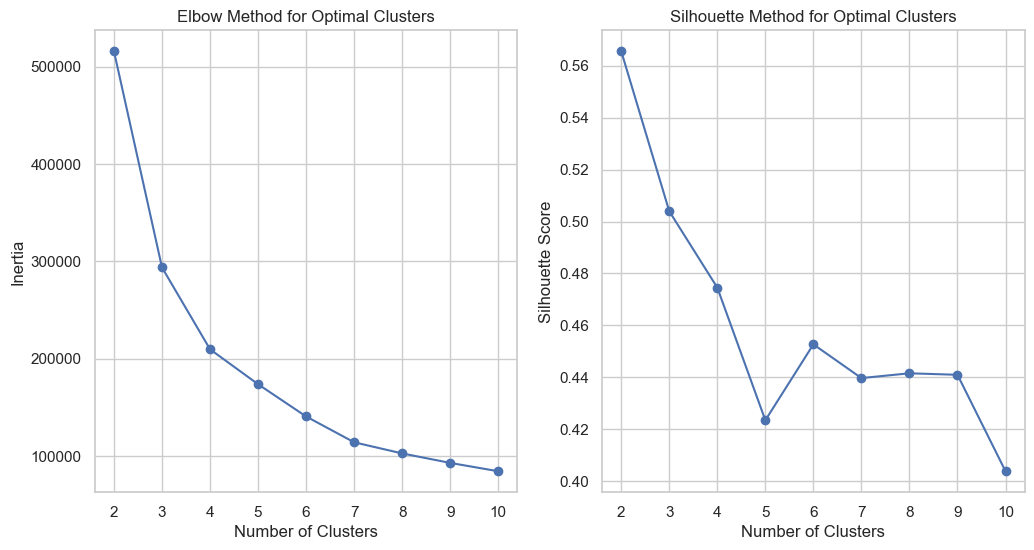

Best Number of Clusters for K-Means: 2


In [343]:
# Determine the optimal number of clusters using the Elbow Method and Silhouette Method
range_n_clusters = list(range(2, 11))  # We will check for cluster numbers from 2 to 10
inertia = []  # List to store the inertia (sum of squared distances) for each number of clusters
silhouette_scores = []  # List to store the silhouette scores for each number of clusters

# Loop over the range of cluster numbers to calculate inertia and silhouette scores
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)  # Initialize KMeans with current number of clusters
    cluster_labels = kmeans.fit_predict(X)  # Fit the model and predict cluster labels

    inertia.append(kmeans.inertia_)  # Append the inertia to the list
    silhouette_avg = silhouette_score(X, cluster_labels)  # Calculate the silhouette score for the current clustering
    silhouette_scores.append(silhouette_avg)  # Append the silhouette score to the list

# Plotting the Elbow Method
plt.figure(figsize=(12,6))  # Create a figure with specified size

plt.subplot(1, 2, 1)  # Create a subplot (1 row, 2 columns, 1st subplot)
plt.plot(range_n_clusters, inertia, marker='o')  # Plot the inertia values with markers
plt.title('Elbow Method for Optimal Clusters')  # Set the title of the plot
plt.xlabel('Number of Clusters')  # Set the x-axis label
plt.ylabel('Inertia')  # Set the y-axis label
plt.xticks(range_n_clusters)  # Set the ticks on the x-axis

# Plotting the Silhouette Method
plt.subplot(1, 2, 2)  # Create another subplot (1 row, 2 columns, 2nd subplot)
plt.plot(range_n_clusters, silhouette_scores, marker='o')  # Plot the silhouette scores with markers
plt.title('Silhouette Method for Optimal Clusters')  # Set the title of the plot
plt.xlabel('Number of Clusters')  # Set the x-axis label
plt.ylabel('Silhouette Score')  # Set the y-axis label
plt.xticks(range_n_clusters)  # Set the ticks on the x-axis

plt.show()  # Display the plots

# Find the best number of clusters based on the highest silhouette score
best_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because range starts from 2
print("Best Number of Clusters for K-Means:", best_n_clusters)  # Print the best number of clusters


### Elbow Method
1. The Elbow Method involves plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters.
2. The idea is to identify the "elbow point," where the decrease in Inertia begins to slow down significantly. This point typically represents a balance between the number of clusters and the variance explained.

From the plot we can see that:

1. The Inertia drops significantly from 1 to 2 clusters. After 3 clusters, the decrease in inertia starts to diminish.
2. This suggests that 2 clusters might be a good choice, as adding more clusters beyond this point results in smaller incremental improvements.

### Silhouette Score
1. The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, with higher values indicating better-defined clusters.

From the plot we can see that:

1. The Silhouette Score is highest for 2 clusters.
Given that the Elbow Method suggests 2 clusters, we will consider the optimal number of clusters to be 2 

**Note:** The Silhouette Score is still fairly high for 3 clusters, 3 clusters can also be a reasonable choice.

## Implementing the Clustering with Optimal Number of Clusters

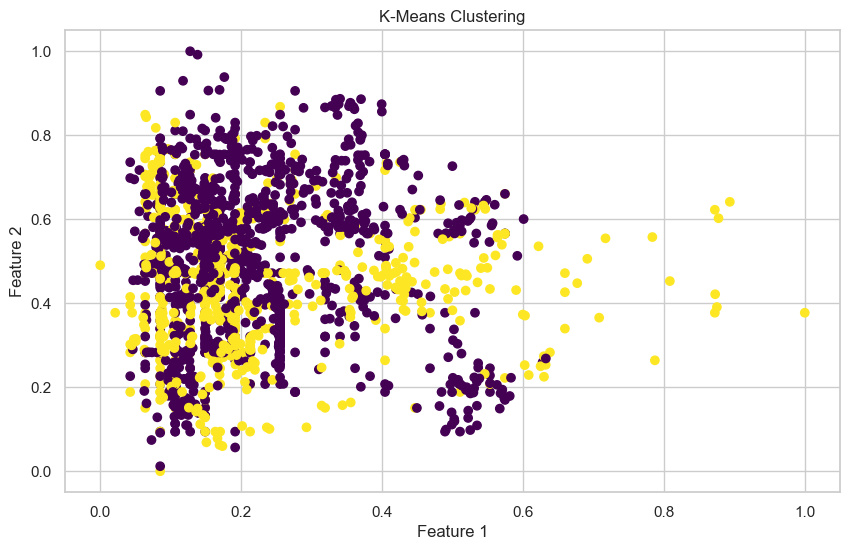

Silhouette Score for K-Means: 0.27084696111304307
Cluster Analysis:
               Age    Height     Weight      FCVC       NCP      CH2O  \
Cluster                                                                 
0        24.304320  1.710342  91.830181  2.454466  2.764193  2.028457   
1        24.448285  1.687708  77.098330  2.508314  2.578182  2.026366   

              FAF       TUE  NObeyesdad  Gender_Male  ...  SMOKE_yes  \
Cluster                                               ...              
0        0.929683  0.620442    3.171014     0.489130  ...   0.022464   
1        1.176486  0.746174    2.710042     0.533239  ...   0.018388   

          SCC_yes  CALC_Frequently  CALC_Sometimes   CALC_no  MTRANS_Bike  \
Cluster                                                                     
0        0.039855          0.00000             1.0  0.000000     0.002899   
1        0.057992          0.09901             0.0  0.899576     0.004243   

         MTRANS_Motorbike  MTRANS_Public_

In [425]:
# Optimal number of clusters
optimal_clusters = 2 # We have determined that 3 is the optimal number of clusters

# Fit K-Means model
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)  # Initialize KMeans with the optimal number of clusters
kmeans.fit(X_scaled)  # Fit the KMeans model to the scaled data
kmeans_labels = kmeans.labels_  # Get the cluster labels for each data point

# Plot the K-Means clustering
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', marker='o')  # Scatter plot of the clustered data
plt.title('K-Means Clustering')  # Set the plot title
plt.xlabel('Feature 1')  # Set the x-axis label
plt.ylabel('Feature 2')  # Set the y-axis label
plt.show()  # Display the plot

# Silhouette Score for K-Means
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)  # Calculate the silhouette score for the KMeans clustering
print("Silhouette Score for K-Means:", kmeans_silhouette)  # Print the silhouette score

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Ensure data_encoded does not include the cluster column when passing columns to DataFrame
#original_columns = data_encoded.columns[:-1]  # Exclude the last column if it includes cluster labels

# Create a DataFrame to analyze the cluster centers
#cluster_centers_df = pd.DataFrame(cluster_centers, columns=data_encoded.columns)
#print("Cluster Centers:")
#print(cluster_centers_df)

# Add cluster labels to the original data
data_with_clusters = data_encoded.copy()
data_with_clusters['Cluster'] = kmeans_labels

# Group data by clusters and calculate the mean for each feature
cluster_analysis = data_with_clusters.groupby('Cluster').mean()
print("Cluster Analysis:")
print(cluster_analysis)



**As we can see from the above graph, the graph is not properly clustered. This might be because of dimensionality. Let's try PCA and try to reduce the dimensionality and improve clustering performance.**

**Interpretation of Cluster Analysis**

**Age and Weight:** Cluster 1 has older individuals with a higher average weight compared to Cluster 0 and 2 (Cluster 1>0>2)

**Physical Activity:** Cluster 0 has higher physical activity levels (FAF) and spends more time using technology devices (TUE) than Cluster 1 and 2 (Cluster 0>2>1)

**Gender Distribution:** Cluster 1 has a higher proportion of males compared to Cluster 0.(Cluster 1>2>0)

**Alcohol Consumption:** Individuals in Cluster 1 consume alcohol more frequently compared to those in Cluster 0.(Cluster 1>2>0)

**Transportation Modes:** Public transportation is the most common mode of transportation in both clusters, but Cluster 0 has a higher proportion of individuals using it along with walking and biking. On the contrary Cluster 2 has highest use of walking and motorbiking.

**Obesity Levels:** Cluster 1 shows a significantly higher average obesity level score (NObeyesdad) than Cluster 0.(Cluster 1>2>0)


The clusters reveal distinct groups within the dataset, characterized by differences in age, weight, physical activity, and lifestyle choices. These insights can be used to tailor interventions for obesity prevention and management, targeting specific groups based on their characteristics and behaviors.

In [337]:
data_encoded.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'NObeyesdad', 'Gender_Male', 'family_history_with_overweight_yes',
       'FAVC_yes', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes',
       'SCC_yes', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'],
      dtype='object')

## Dimensionality Reduction using PCA

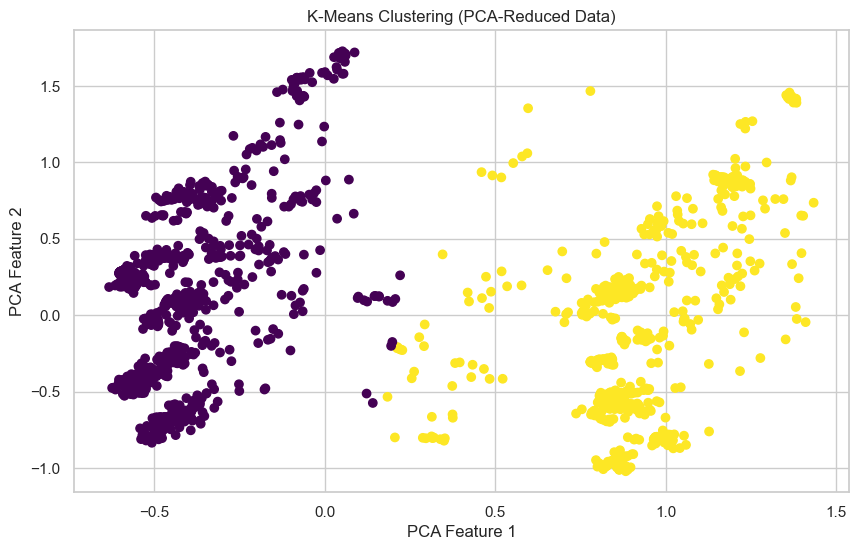

Silhouette Score for K-Means (PCA-Reduced Data): 0.5729069713661553
Cluster Centers in PCA-Reduced Space:
   PCA Feature 1  PCA Feature 2
0      -0.457561       0.054294
1       0.893118      -0.105976


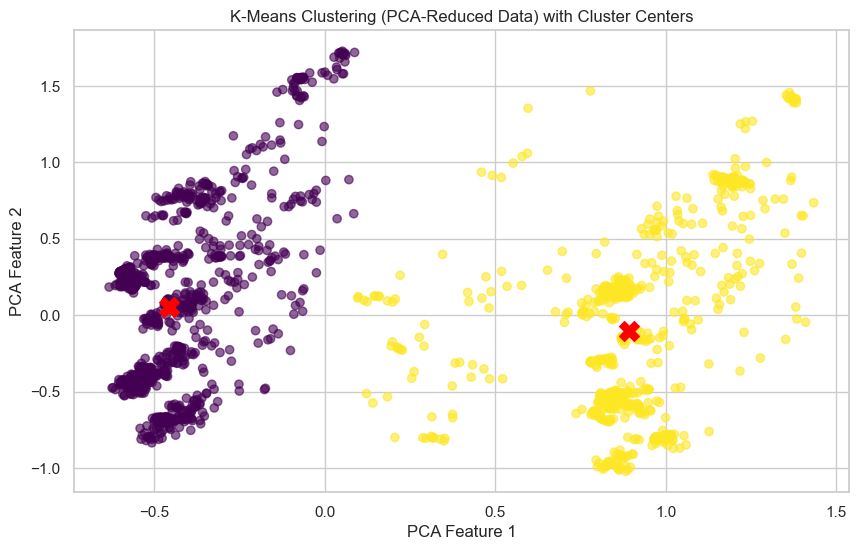

In [426]:
# Applying PCA to reduce the data to 2 dimensions for better visualization
pca = PCA(n_components=2)  # Specify 2 components for visualization
X_pca = pca.fit_transform(X_scaled)  # Fit PCA and transform the data

# Fit K-Means clustering on the PCA-reduced data
kmeans_pca = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_pca.fit(X_pca)  # Fit K-Means model to the PCA-reduced data
kmeans_pca_labels = kmeans_pca.labels_  # Get the labels of clusters

# Plotting the PCA-reduced data with K-Means clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pca_labels, cmap='viridis', marker='o')
plt.title('K-Means Clustering (PCA-Reduced Data)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

# Calculate the Silhouette Score for K-Means on PCA-reduced data
kmeans_pca_silhouette = silhouette_score(X_pca, kmeans_pca_labels)
print("Silhouette Score for K-Means (PCA-Reduced Data):", kmeans_pca_silhouette)

# Analyze the cluster centers in PCA-reduced data
pca_centers = pca.transform(cluster_centers)  # Transform original cluster centers to PCA space
pca_centers_df = pd.DataFrame(pca_centers, columns=['PCA Feature 1', 'PCA Feature 2'])
print("Cluster Centers in PCA-Reduced Space:")
print(pca_centers_df)

# Visualize the PCA-reduced cluster centers
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o', alpha=0.6)
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], c='red', marker='X', s=200)  # Plot cluster centers
plt.title('K-Means Clustering (PCA-Reduced Data) with Cluster Centers')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()


**We can see now the clusters are well defined and seperated as compared to the baseline model. Besides, we can also see that the silhoutte score also notched up to 0.57 which is a really good score.**

## Hierarchical Clustering

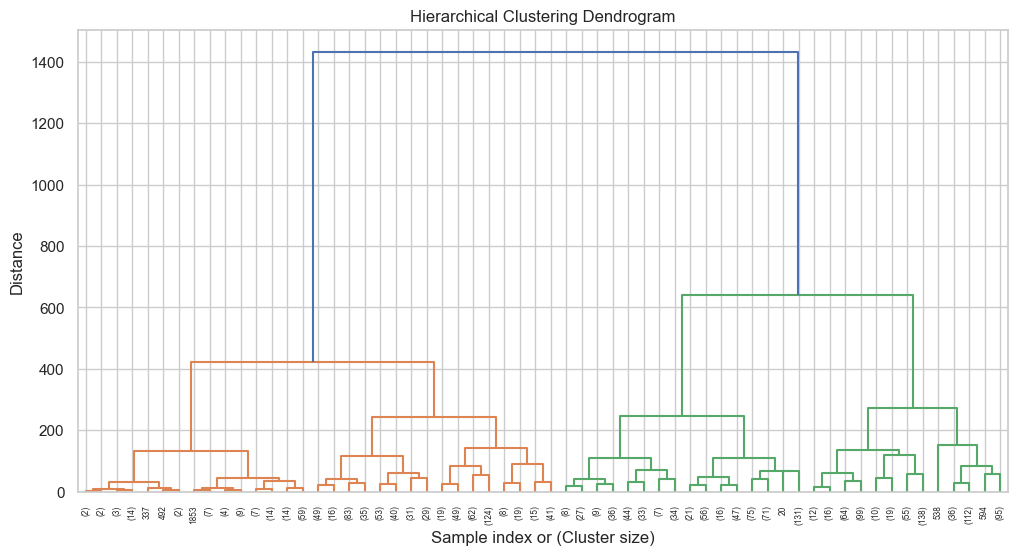

In [427]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering
linked = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12,6))
#limits the plot to show only the top levels of the clustering hierarchy to make it more intepretable
dendrogram(linked, truncate_mode='level', p=5) 
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (Cluster size)')
plt.ylabel('Distance')
plt.show()


**To determine the optimal number of clusters from a dendrogram, you typically look for the longest vertical distance (height) without horizontal cuts. This is often referred to as the "elbow" method in hierarchical clustering. In our dendrogram, we want to identify the largest jump in distance between merged clusters.**

**Steps to Cut the Dendrogram for Optimal Clusters:**

1. Identify the Longest Vertical Line: Find the longest vertical line in the dendrogram that is not intersected by any other horizontal line. This typically represents the largest distance between merged clusters.

2. Cut Just Below the Longest Vertical Line: Draw a horizontal line just below this point. This cut determines the number of clusters.

**Analysis of Your Dendrogram:**

From the dendrogram above:

1. The longest vertical line appears to be the one at the top, splitting the two main groups at a height around 1400.
The second noticeable long vertical line splits the green and orange clusters at around 400 height. So we will cut the dendogram just below 400 to get optimal number of clusters.

In [428]:
#Cutting the dendogram at Distance of 390
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Cut the dendrogram at a specific height (e.g.,390) to get clusters
threshold = 390
clusters = fcluster(linked, threshold, criterion='distance')

# Number of clusters
num_clusters = len(set(clusters))
print(f'Optimal number of clusters: {num_clusters}')

Optimal number of clusters: 4


In [429]:
#Cutting the dendogram at Distance of 450
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Cut the dendrogram at a specific height (e.g.,450) to get clusters
threshold = 450
clusters = fcluster(linked, threshold, criterion='distance')

# Number of clusters
num_clusters = len(set(clusters))
print(f'Optimal number of clusters: {num_clusters}')

Optimal number of clusters: 3


In [430]:
# Fit the Agglomerative Clustering model
hierarchical = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
#hierarchical = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X)

# Add hierarchical cluster labels to the data
data_encoded['Hierarchical_Cluster'] = hierarchical_labels

# Calculate and print the silhouette score
hierarchical_silhouette = silhouette_score(X, hierarchical_labels)
print("Silhouette Score for Hierarchical Clustering:", hierarchical_silhouette)

Silhouette Score for Hierarchical Clustering: 0.47495961152197214


**For n=4, we are getting the Silhouette Score of 0.47 which is very good. So, let's proceed with 2 clusters to be the optimal cluster value.**

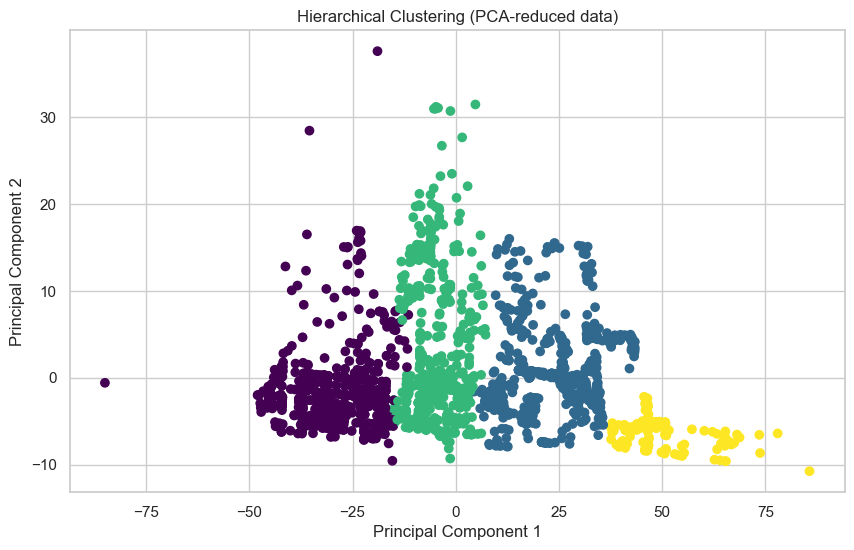

In [431]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis', marker='o')
plt.title('Hierarchical Clustering (PCA-reduced data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()